## Team E - Forest Cover Type Classification

### Sections
* [0 - Understanding the problem, the requirements and the goal](#1)
* [1 - Data Collection: reading and visualizing the data & understanding the goal](#2)
* [2 - Data Cleaning: preparing the data and analyzing it](#3)
* [3 - Feature engineering: creating new features and cleaning the data](#4)
* [4 - Model training: training the model](#5)
* [5 - Model Evaluation](#6)

In [1]:
# Imports of Pandas, NumPy and data visualization libraries
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import pandas as pd
from pandas_profiling import ProfileReport

import numpy as np
import itertools
from collections import defaultdict
from operator import itemgetter

# Imports of necessary preprocessing and ML libraries
from sklearn.preprocessing import StandardScaler, RobustScaler , MinMaxScaler
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import IsolationForest
from sklearn.metrics import mean_absolute_error

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')


<a id='1'></a>
## 0 - Understanding the problem, the requirements and the goal

#### Introduction

In this competition we are asked to predict the forest cover type (the predominant kind of tree cover) from strictly cartographic variables (as opposed to remotely sensed data). The actual forest cover type for a given 30 x 30 meter cell was determined from US Forest Service (USFS) Region 2 Resource Information System data. Independent variables were then derived from data obtained from the US Geological Survey and USFS. The data is in raw form (not scaled) and contains binary columns of data for qualitative independent variables such as wilderness areas and soil type.

This study area includes four wilderness areas located in the Roosevelt National Forest of northern Colorado. These areas represent forests with minimal human-caused disturbances, so that existing forest cover types are more a result of ecological processes rather than forest management practices.


#### Goal

This task proposes a classification problem: predict the forest cover type (the predominant kind of tree cover) from strictly cartographic variables (as opposed to remotely sensed data). The study area includes four wilderness areas located in the Roosevelt National Forest of northern Colorado. Each observation is a 30m x 30m patch. You are asked to predict an integer classification for the forest cover type. The seven types are:
1. Spruce/Fir
2. Lodgepole Pine
3. Ponderosa Pine
4. Cottonwood/Willow
5. Aspen
6. Douglas-fir
7. Krummholz

The training set (15120 observations) contains both features and the Cover_Type. The test set contains only the features.

You must predict the Cover_Type for every row in the test set (565892 observations).

#### Evaluation Metrics

The evaluation metric for this competition is **multi-class classification accuracy**. This metric is commonly used for classification problems.


<a id='2'></a>

## 1. Data Collection: reading and visualizing the data & understanding the goal

The data we're going to use is from the kaggle dataset's competition, and our goal is to create a Machine Learning model that predicts the forest cover type from the given cartographic variables.

In [2]:
df = pd.read_csv("Train.csv",sep=',', index_col='Id')
df.head()

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
Id                                                               
1        2596      51      3                               258   
2        2590      56      2                               212   
3        2804     139      9                               268   
4        2785     155     18                               242   
5        2595      45      2                               153   

    Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
Id                                                                    
1                                0                              510   
2                               -6                              390   
3                               65                             3180   
4                              118                             3090   
5                               -1                              391   

    Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
Id                                                 
1             221             232            148   
2             220             235            151   
3             234             238            135   
4             238             238            122   
5             220             234            150   

    Horizontal_Distance_To_Fire_Points  ...  Soil_Type32  Soil_Type33  \
Id                                      ...                             
1                                 6279  ...            0            0   
2                                 6225  ...            0            0   
3                                 6121  ...            0            0   
4                                 6211  ...            0            0   
5                                 6172  ...            0            0   

    Soil_Type34  Soil_Type35  Soil_Type36  Soil_Type37  Soil_Type38  \
Id                                                                    
1             0            0            0            0            0   
2             0            0            0            0            0   
3             0            0            0            0            0   
4             0            0            0            0            0   
5             0            0            0            0            0   

    Soil_Type39  Soil_Type40  Cover_Type  
Id                                        
1             0            0           5  
2             0            0           5  
3             0            0           2  
4             0            0           2  
5             0            0           5  

[5 rows x 55 columns]

### Data Exploration
**Name** | **Measurement** | **Description**
:-------------------|:---------------:|--------------------:
Elevation       | meters   | Elevation in meters
Aspect       | azimuth   | Aspect in degrees azimuth
Slope       | degrees   | Slope in degrees
Horizontal Distance to Hydrology       | meters   | Horz Dist to nearest surface water features
Vertical Distance to Hydrology       | meters   | Vert Dist to nearest surface water features
Horizontal Distance To Roadways      | meters   | Horz Dist to nearest roadway
Hillshade 9am      | 0 to 255 index   | Hillshade index at 9am, summer solstice
Hillshade Noon      | 0 to 255 index   | Hillshade index at noon, summer soltice
Hillshade 3pm     | 0 to 255 index   | Hillshade index at 3pm, summer soltice
Horizontal Distance To Fire Points    | meters   | Horz Dist to nearest wildfire ignition points
Horizontal Distance To Fire Points    | meters   | Horz Dist to nearest wildfire ignition points
Wilderness Area (4 binary columns) | 0 (absence) or 1 (presence) | Wilderness area designation
Soil Type (40 binary columns) | 0 (absence) or 1 (presence) | Soil Type designation
Cover Type | Classes 1 to 7 | Forest Cover Type designation - Response Variable

In [3]:
profile = ProfileReport(df, title="Pandas Profiling Report", minimal=False)
profile

NameError: name 'ProfileReport' is not defined

In [4]:
df.keys()

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

In [5]:
#Assigning the target variable and features to different sets
y = df['Cover_Type']
X = df.drop(columns='Cover_Type')
X.shape

(15120, 54)

<a id='3'></a>

## 2. Data Cleaning: preparing the data and analyzing it.

So far, we have read the dataset and we have a convenient pandas dataframe to play around with. Before even thinking about training our model, we need to deal with this messiness. 

This section is as follows:
1. Checking datatypes
2. Hunting null values
3. Checking the distribution of features
4. Scaling features
5. Checking correlations between features
6. Adding meaningful representations
7. Outliers detection
    * Graphically: box-plot
    * Isolation Forest technique
    * Interquartile Range (IQR)
8. Analyzing soil names
9. Exploring Wildness_Area_Type

#### Checking datatypes

In [6]:
X.dtypes

Elevation                             int64
Aspect                                int64
Slope                                 int64
Horizontal_Distance_To_Hydrology      int64
Vertical_Distance_To_Hydrology        int64
Horizontal_Distance_To_Roadways       int64
Hillshade_9am                         int64
Hillshade_Noon                        int64
Hillshade_3pm                         int64
Horizontal_Distance_To_Fire_Points    int64
Wilderness_Area1                      int64
Wilderness_Area2                      int64
Wilderness_Area3                      int64
Wilderness_Area4                      int64
Soil_Type1                            int64
Soil_Type2                            int64
Soil_Type3                            int64
Soil_Type4                            int64
Soil_Type5                            int64
Soil_Type6                            int64
Soil_Type7                            int64
Soil_Type8                            int64
Soil_Type9                      

> All the features are in their correct formats: int64

#### Hunting null values

In [7]:
missing_values = X.isnull().sum()
missing_values

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


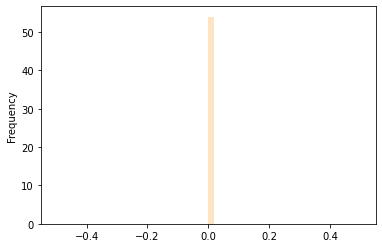

In [8]:
pd.Series(missing_values).plot.hist(color='bisque',bins=50)

> There are no missing values in the dataset.

#### Checking the distribution of features

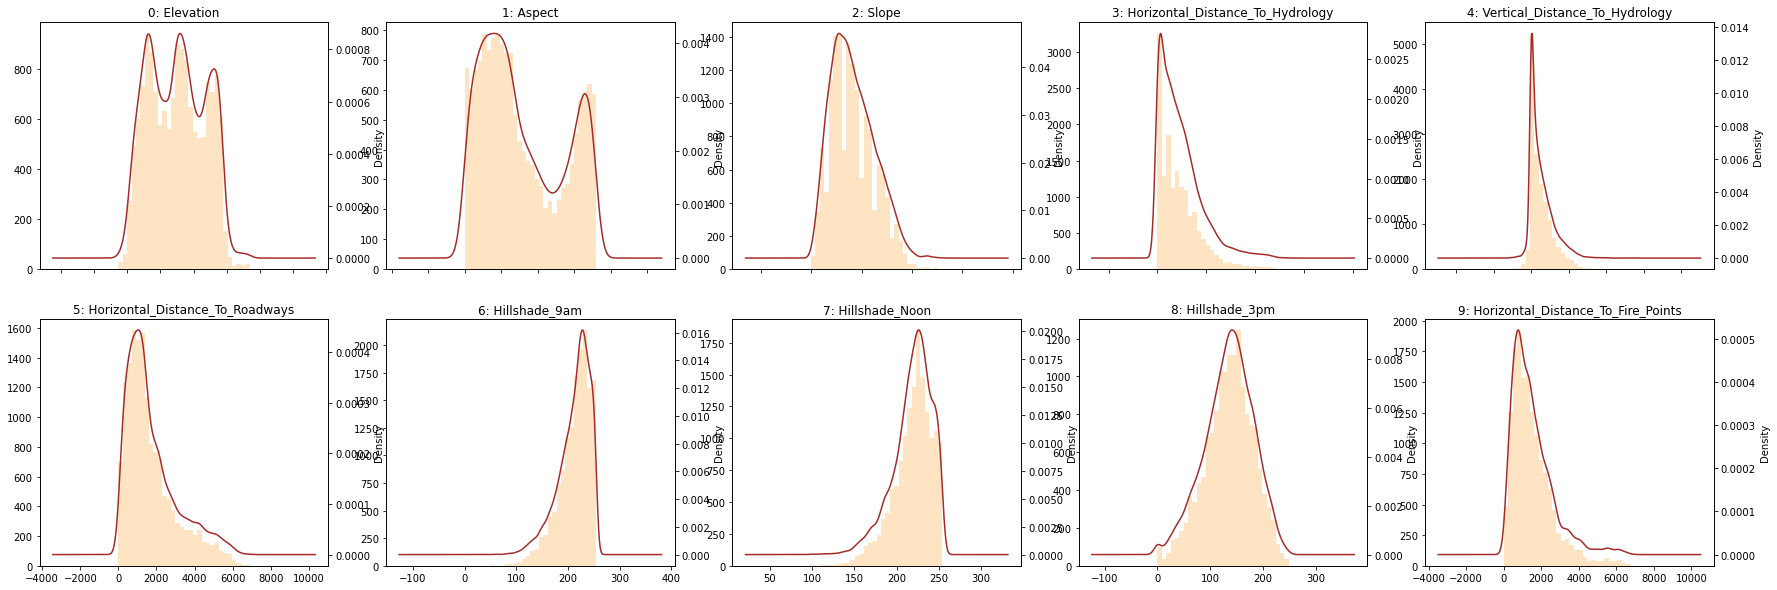

In [9]:
#Checking each variable's distribution
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(2, 5, figsize=(30, 10))
columns = X.keys()

for i, ax in enumerate(axes.ravel()):
    if i > 9:
        ax.set_visible(False)
        continue
    ax.hist(X[columns[i]], bins=30,color='bisque')
    ax_kde = ax.twinx()
    X[columns[i]].plot.kde(color='brown',ax = ax_kde)
    ax.set_title("{}: {}".format(i, X.columns[i]))

In [10]:
X.iloc[:,0:10].describe()

Elevation        Aspect         Slope  \
count  15120.000000  15120.000000  15120.000000   
mean    2749.322553    156.676653     16.501587   
std      417.678187    110.085801      8.453927   
min     1863.000000      0.000000      0.000000   
25%     2376.000000     65.000000     10.000000   
50%     2752.000000    126.000000     15.000000   
75%     3104.000000    261.000000     22.000000   
max     3849.000000    360.000000     52.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                      15120.000000                    15120.000000   
mean                         227.195701                       51.076521   
std                          210.075296                       61.239406   
min                            0.000000                     -146.000000   
25%                           67.000000                        5.000000   
50%                          180.000000                       32.000000   
75%                          330.000000                       79.000000   
max                         1343.000000                      554.000000   

       Horizontal_Distance_To_Roadways  Hillshade_9am  Hillshade_Noon  \
count                     15120.000000   15120.000000    15120.000000   
mean                       1714.023214     212.704299      218.965608   
std                        1325.066358      30.561287       22.801966   
min                           0.000000       0.000000       99.000000   
25%                         764.000000     196.000000      207.000000   
50%                        1316.000000     220.000000      223.000000   
75%                        2270.000000     235.000000      235.000000   
max                        6890.000000     254.000000      254.000000   

       Hillshade_3pm  Horizontal_Distance_To_Fire_Points  
count   15120.000000                        15120.000000  
mean      135.091997                         1511.147288  
std        45.895189                         1099.936493  
min         0.000000                            0.000000  
25%       106.000000                          730.000000  
50%       138.000000                         1256.000000  
75%       167.000000                         1988.250000  
max       248.000000                         6993.000000

### Scaling features
The distribution of each variable is different, we might need to use different scaling techniques, for example Vertical_Distance_To_Hydrology has negative values. There are others that has 0 as minimum value (most of them) and the elevation feature does not start at 0. In order to apply the different techniques, we need to standardize the data.

We will use `MinMaxScaler()` which transforms the features by scaling each to a given range between 0 and 1. This estimator scales and translates each feature individually and it is used sometimes as an alternative to the StandardScaler. The motivation to use this scaling include robustness to very small standard deviations of features and preserving zero entries in sparse data. The StandardScaler cannot be used since our features are not normally distributed. 

In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X.iloc[:,0:10])

X_scaled = pd.DataFrame(data = X_scaled, columns= X.iloc[:,0:10].keys())
X_scaled.describe()

Elevation        Aspect         Slope  \
count  15120.000000  15120.000000  15120.000000   
mean       0.446285      0.435213      0.317338   
std        0.210311      0.305794      0.162576   
min        0.000000      0.000000      0.000000   
25%        0.258308      0.180556      0.192308   
50%        0.447633      0.350000      0.288462   
75%        0.624874      0.725000      0.423077   
max        1.000000      1.000000      1.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                      15120.000000                    15120.000000   
mean                           0.169170                        0.281538   
std                            0.156422                        0.087485   
min                            0.000000                        0.000000   
25%                            0.049888                        0.215714   
50%                            0.134028                        0.254286   
75%                            0.245719                        0.321429   
max                            1.000000                        1.000000   

       Horizontal_Distance_To_Roadways  Hillshade_9am  Hillshade_Noon  \
count                     15120.000000   15120.000000    15120.000000   
mean                          0.248770       0.837418        0.773972   
std                           0.192317       0.120320        0.147109   
min                           0.000000       0.000000        0.000000   
25%                           0.110885       0.771654        0.696774   
50%                           0.191001       0.866142        0.800000   
75%                           0.329463       0.925197        0.877419   
max                           1.000000       1.000000        1.000000   

       Hillshade_3pm  Horizontal_Distance_To_Fire_Points  
count   15120.000000                        15120.000000  
mean        0.544726                            0.216094  
std         0.185061                            0.157291  
min         0.000000                            0.000000  
25%         0.427419                            0.104390  
50%         0.556452                            0.179608  
75%         0.673387                            0.284320  
max         1.000000                            1.000000

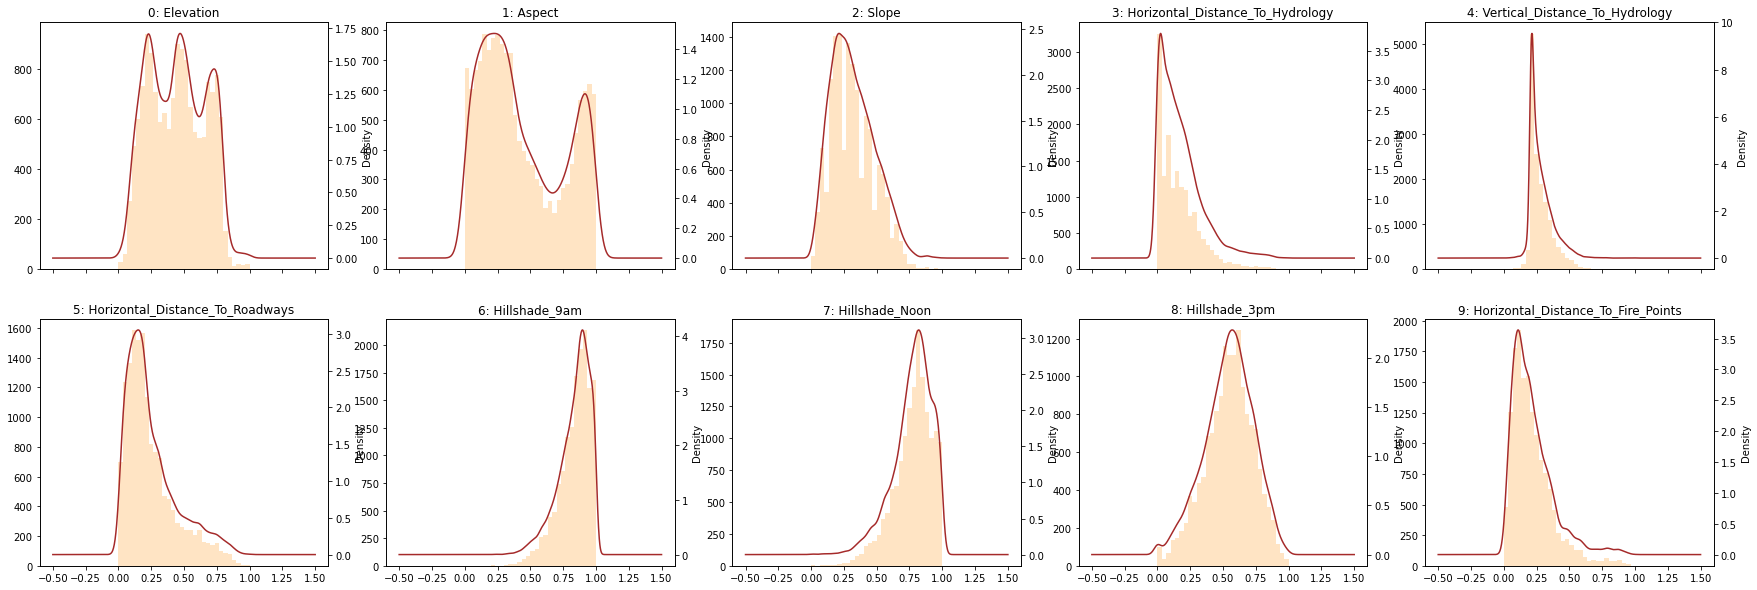

In [12]:
fig, axes = plt.subplots(2, 5, figsize=(30, 10))
columns = X.keys()

for i, ax in enumerate(axes.ravel()):
    if i > 9:
        ax.set_visible(False)
        continue
    ax.hist(X_scaled[columns[i]], bins=30,color='bisque')
    ax_kde = ax.twinx()
    pd.Series(X_scaled[columns[i]]).plot.kde(color='brown',ax = ax_kde)
    ax.set_title("{}: {}".format(i, X.columns[i]))

> The features are now on the same scale. 

> However, we see a peak of zero values in `Hillshade_3pm`, we need to further explore this

#### Checking correlations between features

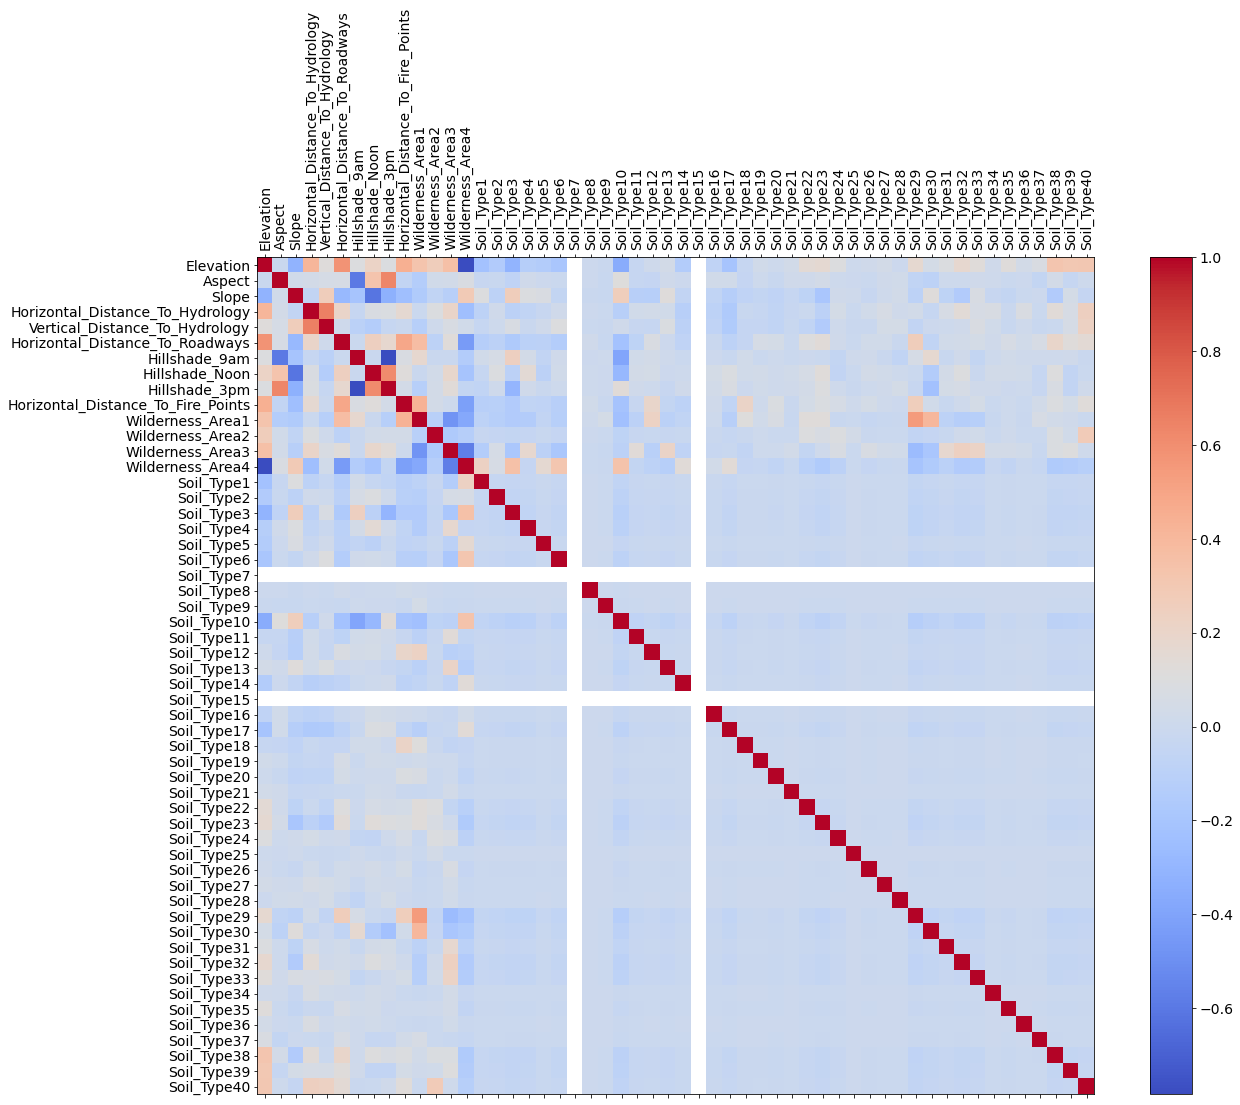

In [13]:
f = plt.figure(figsize=(20, 15))
plt.matshow(X.iloc[:,0:54].corr(), fignum=f.number, cmap=plt.cm.coolwarm)
plt.xticks(range(df.iloc[:,0:54].shape[1]), df.iloc[:,0:54].columns, fontsize=14, rotation=90)
plt.yticks(range(df.iloc[:,0:54].shape[1]), df.iloc[:,0:54].columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

> The map shows the correlations between variables. There are 2 white lines that correspond to two types of soil. In our dataset there are not trees that use those 2 soils, so all the values in that column are 0. 
There is no high correlation between any pair of variables, but they are not completely uncorrelated so we could use PCA to reduce the dimensionality. 

In [14]:
X['Soil_Type7'].sum()

0

In [15]:
X['Soil_Type15'].sum()

0

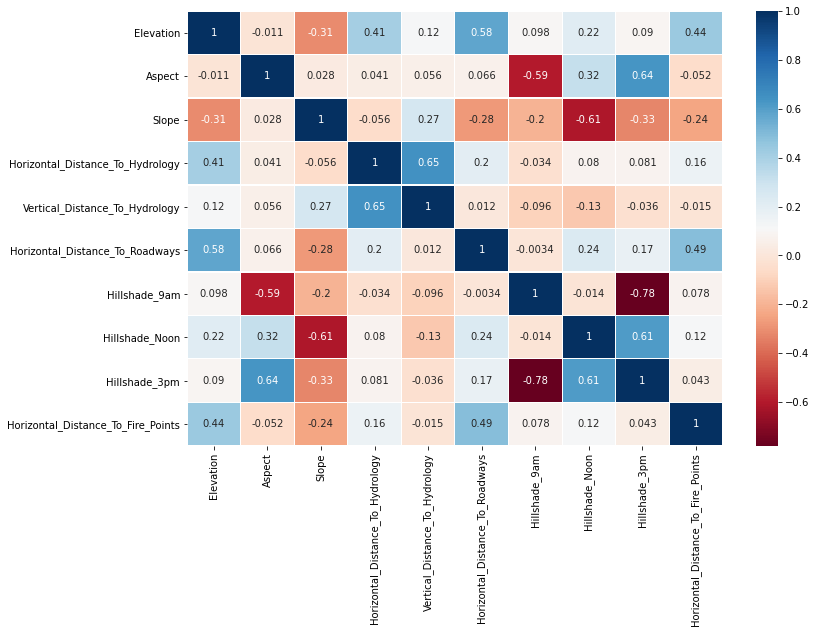

In [16]:
# Pearson coefficients with numeric soil type column
f = plt.figure(figsize=(12, 8))
correlations = pd.DataFrame(X.iloc[:,0:10].corr())

figsize=(16,14)
# plot the heatmap
colormap = plt.cm.RdBu
sns.heatmap(correlations,linewidths=0.1, 
            square=False, cmap=colormap, linecolor='white', annot=True)
plt.show()

#### Adding meaningful representations

**Correlation of `Elevation` and `Slope`**

<Figure size 432x288 with 0 Axes>

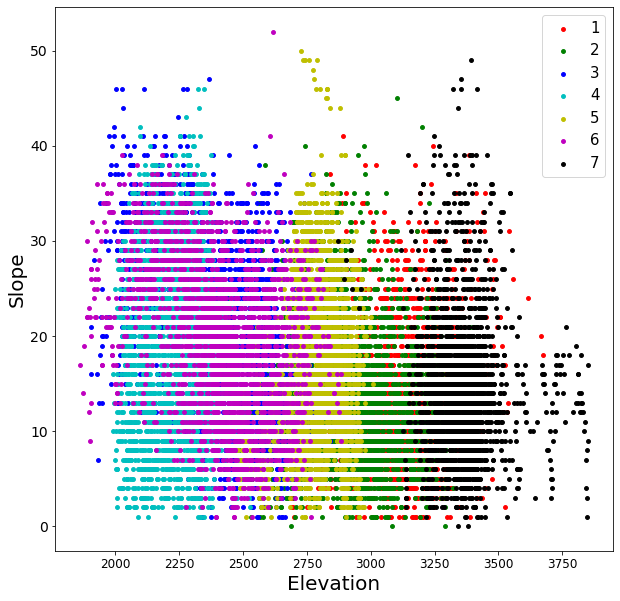

In [17]:
#Elevation and Slope
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Elevation',fontsize=20)
plt.ylabel('Slope',fontsize=20)
targets = [1,2,3,4,5,6,7]
colors = ['r', 'g', 'b', 'c', 'y', 'm', 'k']
for target, color in zip(targets,colors):
    indicesToKeep = df['Cover_Type'] == target
    plt.scatter(df.loc[indicesToKeep, 'Elevation']
               , df.loc[indicesToKeep, 'Slope'], c = color, s = 15)

plt.legend(targets,prop={'size': 15})
plt.show()

**Correlation of `Elevation` and `Aspect`**

<Figure size 432x288 with 0 Axes>

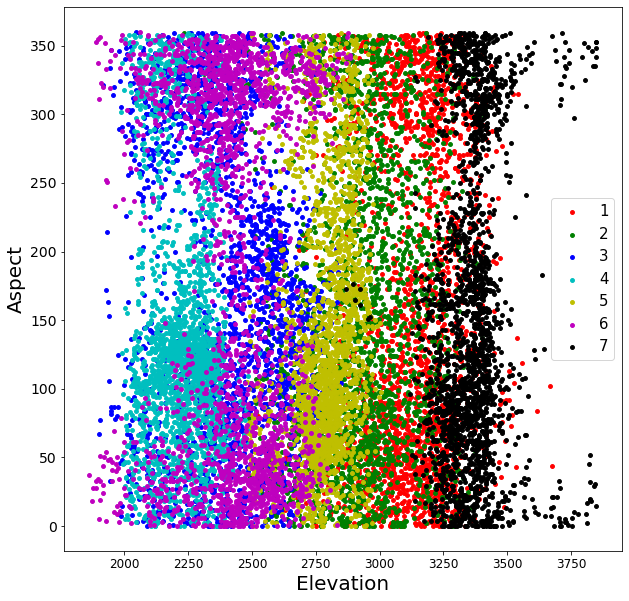

In [18]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Elevation',fontsize=20)
plt.ylabel('Aspect',fontsize=20)
targets = [1,2,3,4,5,6,7]
colors = ['r', 'g', 'b', 'c', 'y', 'm', 'k']
for target, color in zip(targets,colors):
    indicesToKeep = df['Cover_Type'] == target
    plt.scatter(df.loc[indicesToKeep, 'Elevation']
               , df.loc[indicesToKeep, 'Aspect'], c = color, s = 15)

plt.legend(targets,prop={'size': 15})
plt.show()

**Correlation of `Elevation` and `Horizontal_Distance_To_Roadways`**

<Figure size 432x288 with 0 Axes>

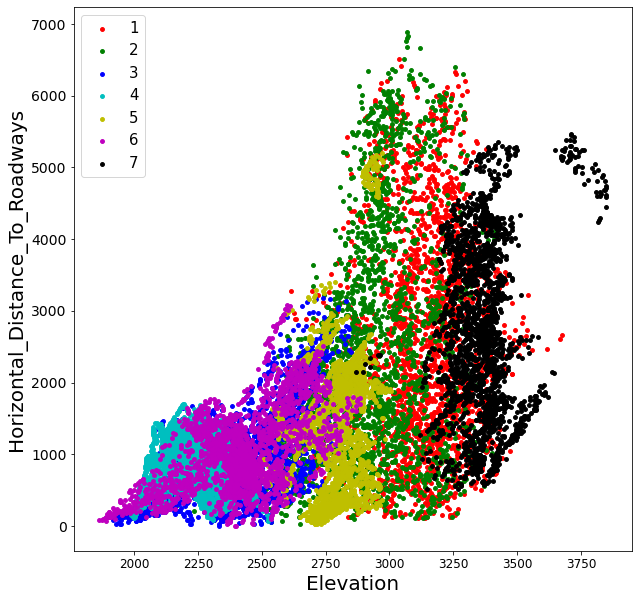

In [19]:
#plt.scatter(df['Horizontal_Distance_To_Hydrology'],df['Vertical_Distance_To_Hydrology'])
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Elevation',fontsize=20)
plt.ylabel('Horizontal_Distance_To_Roadways',fontsize=20)
targets = [1,2,3,4,5,6,7]
colors = ['r', 'g', 'b', 'c', 'y', 'm', 'k']
for target, color in zip(targets,colors):
    indicesToKeep = df['Cover_Type'] == target
    plt.scatter(df.loc[indicesToKeep, 'Elevation']
               , df.loc[indicesToKeep, 'Horizontal_Distance_To_Roadways'], c = color, s = 15)

plt.legend(targets,prop={'size': 15})
plt.show()

**Correlation of `Elevation` and `Horizontal_Distance_To_Hydrology`**

<Figure size 432x288 with 0 Axes>

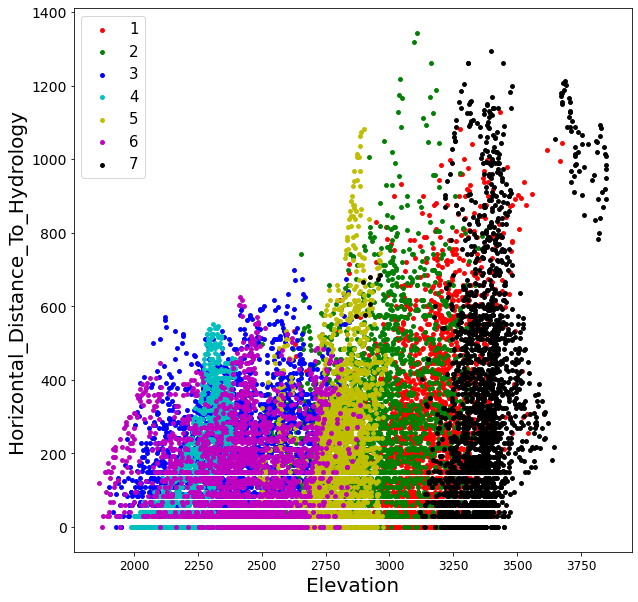

In [20]:
#plt.scatter(df['Horizontal_Distance_To_Hydrology'],df['Vertical_Distance_To_Hydrology'])
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Elevation',fontsize=20)
plt.ylabel('Horizontal_Distance_To_Hydrology',fontsize=20)
targets = [1,2,3,4,5,6,7]
colors = ['r', 'g', 'b', 'c', 'y', 'm', 'k']
for target, color in zip(targets,colors):
    indicesToKeep = df['Cover_Type'] == target
    plt.scatter(df.loc[indicesToKeep, 'Elevation']
               , df.loc[indicesToKeep, 'Horizontal_Distance_To_Hydrology'], c = color, s = 15)

plt.legend(targets,prop={'size': 15})
plt.show()

**Correlation of `Horizontal_Distance_To_Hydrology` and `Vertical_Distance_To_Hydrology`**

<Figure size 432x288 with 0 Axes>

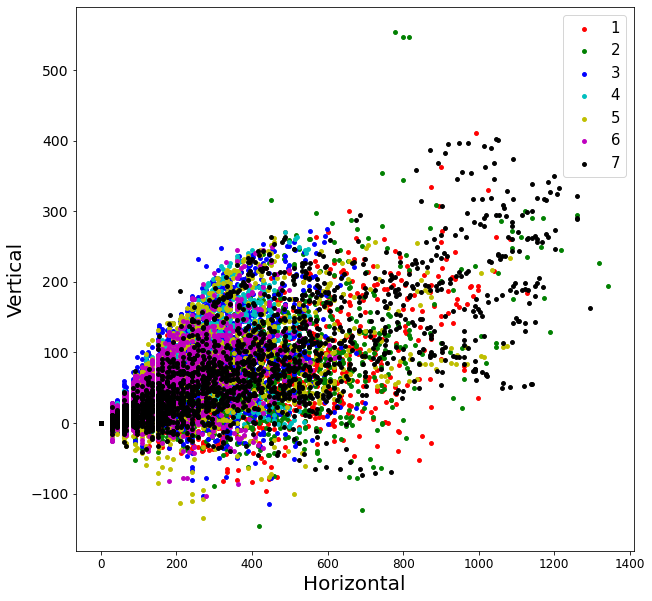

In [21]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Horizontal',fontsize=20)
plt.ylabel('Vertical',fontsize=20)
targets = [1,2,3,4,5,6,7]
colors = ['r', 'g', 'b', 'c', 'y', 'm', 'k']
for target, color in zip(targets,colors):
    indicesToKeep = df['Cover_Type'] == target
    plt.scatter(df.loc[indicesToKeep, 'Horizontal_Distance_To_Hydrology']
               , df.loc[indicesToKeep, 'Vertical_Distance_To_Hydrology'], c = color, s = 15)

plt.legend(targets,prop={'size': 15})
plt.show()

> Graphically, `Vertical_Distance_To_Hydrology` and `Horizontal_Distance_To_Hydrology` show high correlation (also observed in the above correlation matrix) with a correlation coefficient of 0.65 making them the two most positively correlated features.

In [22]:
X.iloc[:,3:6].corr()

Horizontal_Distance_To_Hydrology  \
Horizontal_Distance_To_Hydrology                          1.000000   
Vertical_Distance_To_Hydrology                            0.652142   
Horizontal_Distance_To_Roadways                           0.203397   

                                  Vertical_Distance_To_Hydrology  \
Horizontal_Distance_To_Hydrology                        0.652142   
Vertical_Distance_To_Hydrology                          1.000000   
Horizontal_Distance_To_Roadways                         0.011555   

                                  Horizontal_Distance_To_Roadways  
Horizontal_Distance_To_Hydrology                         0.203397  
Vertical_Distance_To_Hydrology                           0.011555  
Horizontal_Distance_To_Roadways                          1.000000

We observed some points with value zero in `Hillshade_3pm`, we are going to represent the feature. We have 2 options:
* Dropping the points 
* Impute the value using other feature such as `Hillshade_9am` or `Hillshade_noon` (the correlation between them is quite high)
    * `Hillshade_3pm` and `Hillshade_9am` → -0,78
    * `Hillshade_3pm` and `Hillshade_Noon` → 0,61

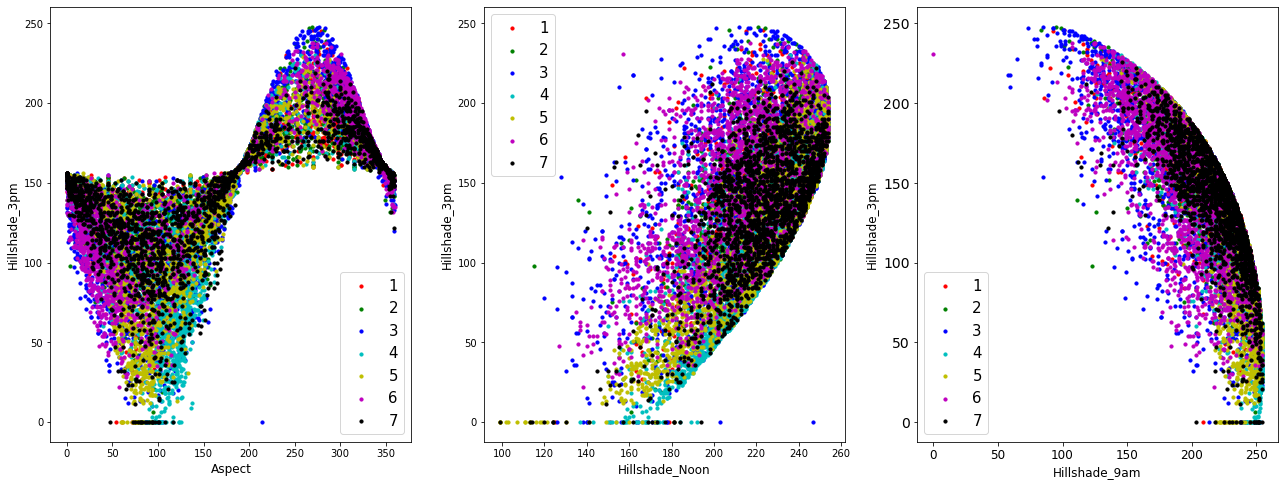

In [23]:
fig, (ax_1, ax_2, ax_3) = plt.subplots(ncols=3, figsize =(22,8))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
targets = [1,2,3,4,5,6,7]
colors = ['r', 'g', 'b', 'c', 'y', 'm', 'k']

for target, color in zip(targets,colors):
    indicesToKeep = df['Cover_Type'] == target
    ax_1.scatter(df.loc[indicesToKeep, 'Aspect']
               , df.loc[indicesToKeep, 'Hillshade_3pm'], c = color, s = 10)
ax_1.legend(targets,prop={'size': 15})
ax_1.set_xlabel('Aspect',fontsize=12)
ax_1.set_ylabel('Hillshade_3pm',fontsize=12)

for target, color in zip(targets,colors):
    indicesToKeep = df['Cover_Type'] == target
    ax_3.scatter(df.loc[indicesToKeep, 'Hillshade_9am']
               , df.loc[indicesToKeep, 'Hillshade_3pm'], c = color, s = 10)
ax_3.legend(targets,prop={'size': 15})
ax_3.set_xlabel('Hillshade_9am',fontsize=12)
ax_3.set_ylabel('Hillshade_3pm',fontsize=12)


for target, color in zip(targets,colors):
    indicesToKeep = df['Cover_Type'] == target
    ax_2.scatter(df.loc[indicesToKeep, 'Hillshade_Noon']
               , df.loc[indicesToKeep, 'Hillshade_3pm'], c = color, s = 10)
ax_2.legend(targets,prop={'size': 15})
ax_2.set_xlabel('Hillshade_Noon',fontsize=12)
ax_2.set_ylabel('Hillshade_3pm',fontsize=12)
plt.show()

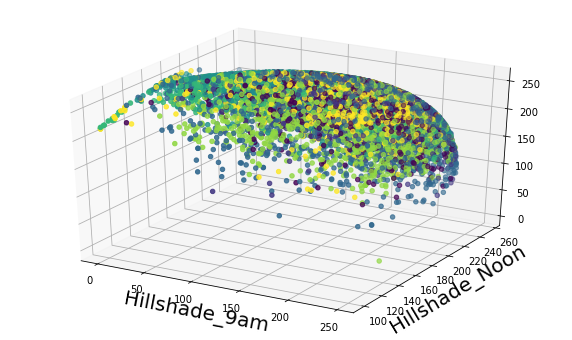

In [24]:
# Using the 3 most important features, that are not boolean
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
 
#fig = plt.figure()
plt.figure(figsize=(10,6))

ax = plt.axes(projection ='3d')
plt.xlabel('Hillshade_9am',fontsize=20)
plt.ylabel('Hillshade_Noon',fontsize=20)
#plt.zlabel('Hillshade_9am',fontsize=20)

z = df['Hillshade_9am']
x = df['Hillshade_3pm']
y = df['Hillshade_Noon']
c = df['Cover_Type']
ax.scatter(x, y, z, cmap='viridis',c = c)
 
plt.show()
ax.grid(False)

#### Is the target feature balanced?

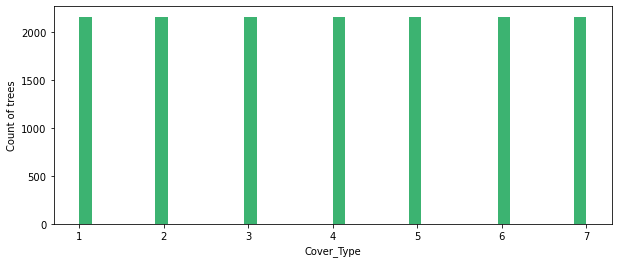

In [25]:
plt.figure(figsize=(10,4))
plt.hist(df['Cover_Type'], bins=40, color='mediumseagreen')
plt.xlabel('Cover_Type')
plt.ylabel('Count of trees')
plt.show()

In [26]:
df.groupby('Cover_Type')['Elevation'].count()

Cover_Type
1    2160
2    2160
3    2160
4    2160
5    2160
6    2160
7    2160
Name: Elevation, dtype: int64

> We have the same amount of trees for each Cover-Type, so we can say that target variable is prefectly balanced. 

#### Detecting Outliers

**1. Graphically: box-plot**

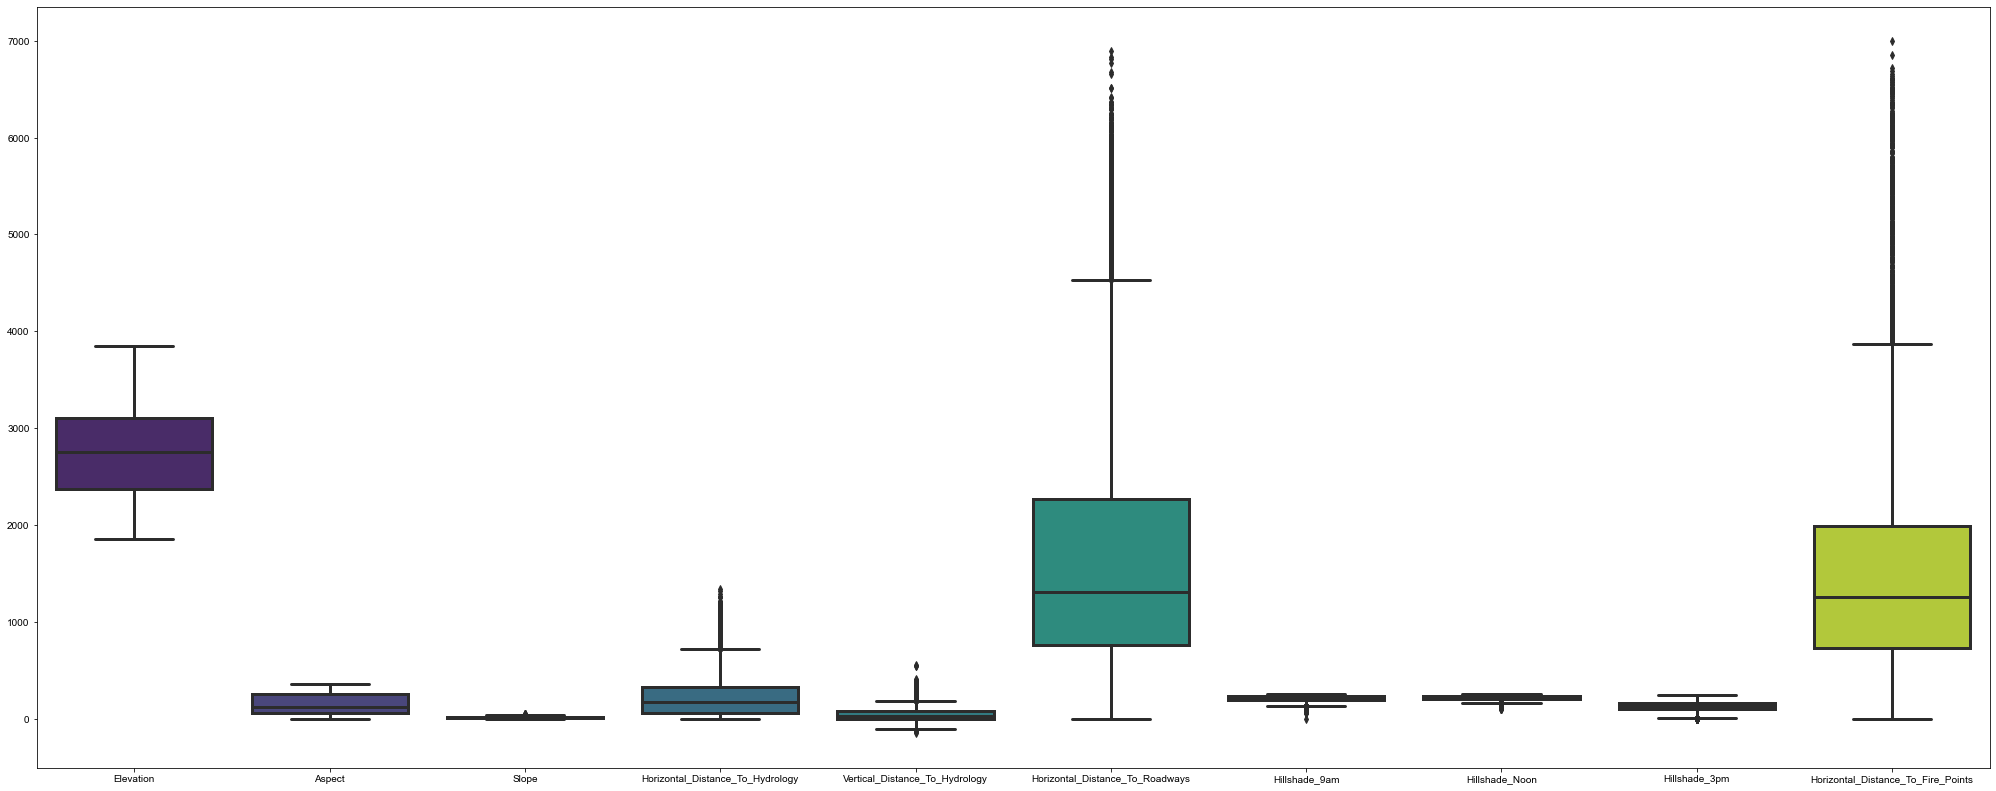

In [27]:
#BEFORE SCALING
import seaborn
fig, axes = plt.subplots(1, figsize=(35, 14))
seaborn.set(style='whitegrid')
seaborn.boxplot(data=X.iloc[:,0:10],linewidth=3,palette='viridis')
plt.show()

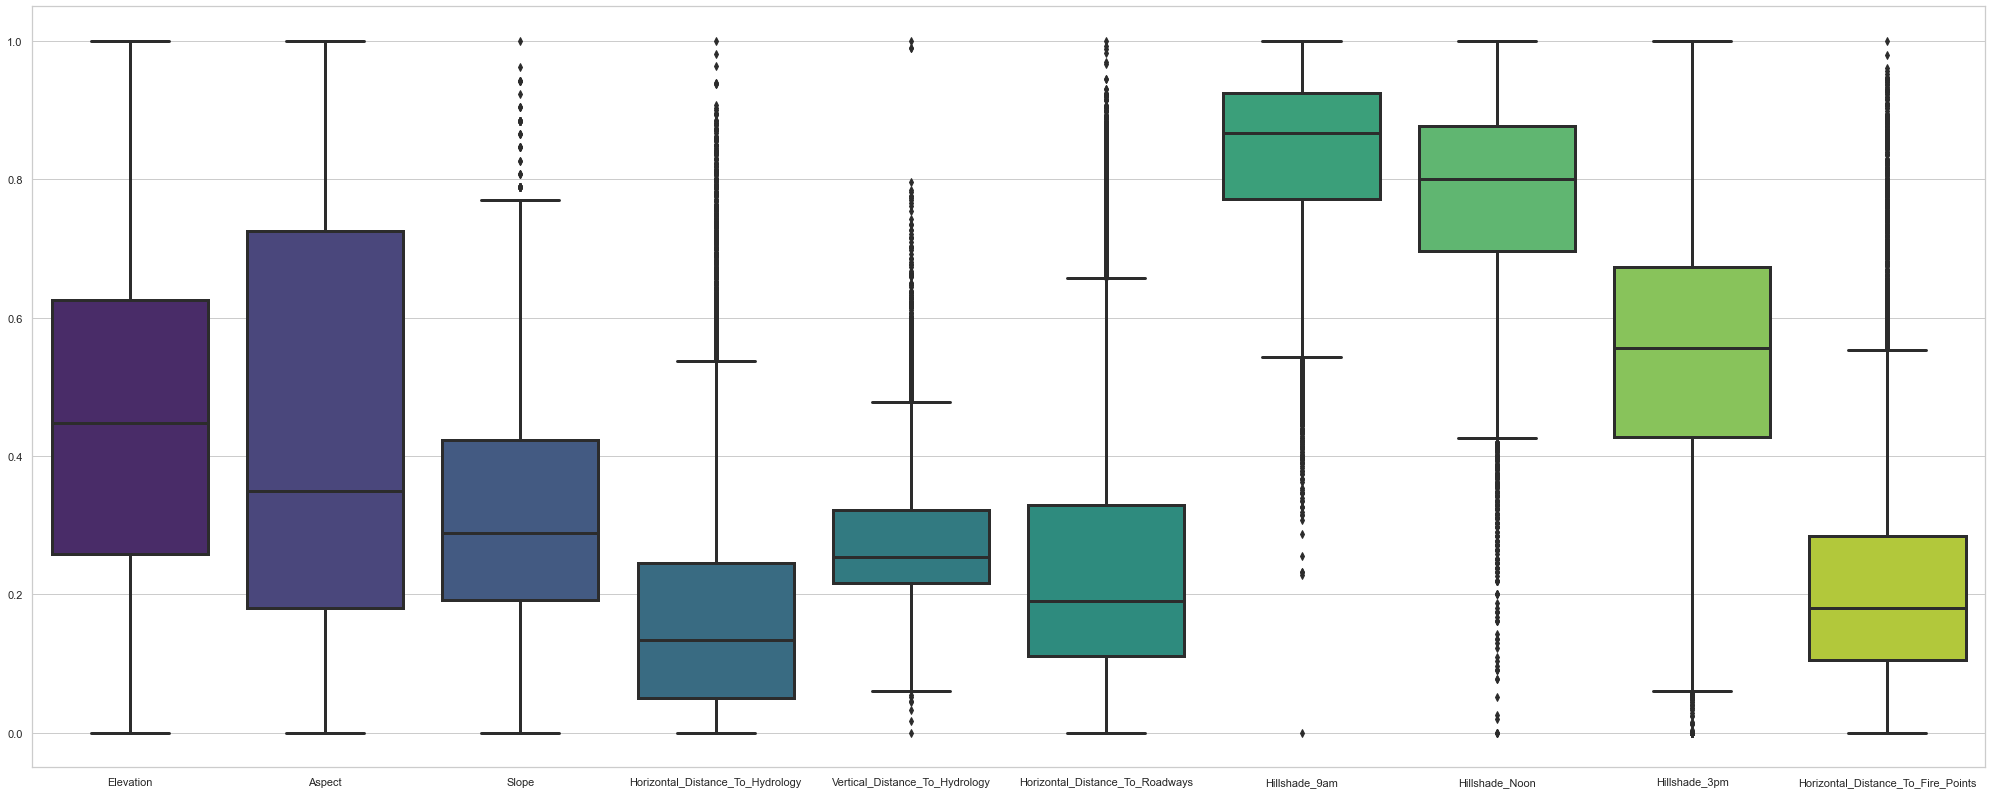

In [28]:
#AFTER SCALING
fig, axes = plt.subplots(1, figsize=(35, 14))
seaborn.set(style='whitegrid')
seaborn.boxplot(data=X_scaled,linewidth=3, palette='viridis')
plt.show()

> After scaling, there is still a presence of outliers in the dataset. We will use techniques implemented in sklearn to deal with them.

**2. Isolation Forest technique for outlier detection**

Isolation Forest or iForest, is a tree-based anomaly detection algorithm . It is based on modeling the normal data in such a way as to isolate anomalies that are both few in number and different in the feature space. Perhaps the most important hyperparameter in the model is the "contamination" argument, which is used to help estimate the number of outliers in the dataset. This is a value between 0.0 and 0.5 and by default is set to 0.1.

In [30]:
df = pd.read_csv('Train.csv',sep=',', index_col='Id')
# load the dataset
df_out = df
# retrieve the array
data = df_out.values
# split into input and output elements
X, y = data[:, :-1], data[:, -1]
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# summarize the shape of the training dataset
print(X_train.shape, y_train.shape)
# identify outliers in the training dataset
iso = IsolationForest(contamination=0.1)
yhat = iso.fit_predict(X_train)
# select all rows that are not outliers
mask = yhat != -1
X_train, y_train = X_train[mask, :], y_train[mask]
# summarize the shape of the updated training dataset
print(X_train.shape, y_train.shape)
# fit the model
model = LinearRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

(10130, 54) (10130,)
(9117, 54) (9117,)
MAE: 1.226


> We performed the Isolation Forest to know how accurate it is in detecting outliers.

**3. Interquartile Range (IQR)**

In [31]:
def outlier_function(df, col_name):
    first_quartile = np.percentile(np.array(df[col_name].tolist()), 25)
    third_quartile = np.percentile(np.array(df[col_name].tolist()), 75)
    IQR = third_quartile - first_quartile

    upper_limit = third_quartile+(3*IQR)
    lower_limit = first_quartile-(3*IQR)
    outlier_count = 0

    for value in df[col_name].tolist():
        if (value < lower_limit) | (value > upper_limit):
            outlier_count +=1
    return lower_limit, upper_limit, outlier_count

In [32]:
X = df.drop(columns='Cover_Type')
for i in X.iloc[:,0:10].columns:
    if outlier_function(X, i)[2] > 0:
        print("There are {} outliers in {}".format(outlier_function(X, i)[2], i))

There are 53 outliers in Horizontal_Distance_To_Hydrology
There are 49 outliers in Vertical_Distance_To_Hydrology
There are 3 outliers in Horizontal_Distance_To_Roadways
There are 7 outliers in Hillshade_9am
There are 20 outliers in Hillshade_Noon
There are 132 outliers in Horizontal_Distance_To_Fire_Points


#### Analyzing soil names

In [33]:
def solve(s0, s1): 
    s0 = s0.lower()
    s1 = s1.lower()
    s0List = s0.split(" ")
    s1List = s1.split(" ")
    return len(list(set(s0List)&set(s1List)))

soil_features = [["Cathedral family Rock outcrop complex extremely stony"], ["Vanet Ratake families complex very stony"], ["Haploborolis Rock outcrop complex rubbly"],
                 ["Ratake family Rock outcrop complex rubbly"], ["Vanet family Rock outcrop complex complex rubbly"], ["Vanet Wetmore families Rock outcrop complex stony"], ["Gothic family"],
                 ["Supervisor Limber families complex"], ["Troutville family very stony"], ["Bullwark Catamount families Rock outcrop complex rubbly"], ["Bullwark Catamount families Rock land complex rubbly"],
                 ["Legault family Rock land complex stony"], ["Catamount family Rock land Bullwark family complex rubbly"], ["Pachic Argiborolis Aquolis complex"], ["unspecified in the USFS Soil and ELU Survey"],
                 ["Cryaquolis Cryoborolis complex"], ["Gateview family Cryaquolis complex"], ["Rogert family very stony"], ["Typic Cryaquolis Borohemists complex"], ["Typic Cryaquepts Typic Cryaquolls complex"],
                 ["Typic Cryaquolls Leighcan family till substratum complex"], ["Leighcan family till substratum extremely bouldery"], ["Leighcan family till substratum Typic Cryaquolls complex"], 
                 ["Leighcan family extremely stony"],["Leighcan family warm extremely stony"],["Granile Catamount families complex very stony"], ["Leighcan family warm  Rock outcrop complex extremely stony"],
                 ["Leighcan family Rock outcrop complex extremely stony"], ["Como Legault families complex extremely stony"], ["Como family Rock land Legault family complex extremely stony"],
                 ["Leighcan Catamount families complex extremely stony"], ["Catamount family Rock outcrop Leighcan family complex extremely stony"],["Leighcan Catamount families Rock outcrop complex extremely stony"],
                 ["Cryorthents Rock land complex, extremely stony"], ["Cryumbrepts Rock outcrop Cryaquepts complex"],  ["Bross family Rock land Cryumbrepts complex extremely stony"],
                 ["Rock outcrop Cryumbrepts Cryorthents complex extremely stony"],["Leighcan Moran families Cryaquolls complex extremely stony"],["Moran family Cryorthents Leighcan family complex extremely stony"],
                 ["Moran family Cryorthents Rock land complex extremely stony"]]

In [34]:
for name in soil_features:
    for name2 in soil_features:
        if name[0] != name2[0]:
            shred = solve(name[0],name2[0])
            #if ((shred < len(name[0].split(" "))) & (shred >= 6)):
            if (shred >= 7):
                print(name[0],' - ',name2[0],':',shred,'/','(',len(name[0].split(" ")),',',len(name2[0].split(" ")),')')

Typic Cryaquolls Leighcan family till substratum complex  -  Leighcan family till substratum Typic Cryaquolls complex : 7 / ( 7 , 7 )
Leighcan family till substratum Typic Cryaquolls complex  -  Typic Cryaquolls Leighcan family till substratum complex : 7 / ( 7 , 7 )
Leighcan family warm  Rock outcrop complex extremely stony  -  Leighcan family Rock outcrop complex extremely stony : 7 / ( 9 , 7 )
Leighcan family warm  Rock outcrop complex extremely stony  -  Catamount family Rock outcrop Leighcan family complex extremely stony : 7 / ( 9 , 9 )
Leighcan family Rock outcrop complex extremely stony  -  Leighcan family warm  Rock outcrop complex extremely stony : 7 / ( 7 , 9 )
Leighcan family Rock outcrop complex extremely stony  -  Catamount family Rock outcrop Leighcan family complex extremely stony : 7 / ( 7 , 9 )
Catamount family Rock outcrop Leighcan family complex extremely stony  -  Leighcan family warm  Rock outcrop complex extremely stony : 7 / ( 9 , 9 )
Catamount family Rock outcr

> If we analyze the words shared between the soil types, we can observe that some of them have the same words in different order. The meaning is almost the same. We can consider joining some them. 

#### Exploring `Wilderness_Area_Type`

In [35]:
# Create one column as Wilderness_Area_Type and represent it as categorical data
df['Wilderness_Area_Type'] = (df.iloc[:, 10:14] == 1).idxmax(1)
wilderness_areas = sorted(df['Wilderness_Area_Type'].value_counts().index.tolist())
cover_types = sorted(df['Cover_Type'].unique())
table = pd.DataFrame()

for area in wilderness_areas:
    type_area = df[df['Wilderness_Area_Type'] == area]
    area_type = []
    for cover in cover_types:
        at_num = type_area[type_area['Cover_Type'] == cover]['Elevation'].count() 
        area_type.append(at_num)       
    table[area] = area_type
    
table

Wilderness_Area1  Wilderness_Area2  Wilderness_Area3  Wilderness_Area4
0              1062               181               917                 0
1              1134                66               940                20
2                 0                 0               863              1297
3                 0                 0                 0              2160
4               856                 0              1304                 0
5                 0                 0               962              1198
6               545               252              1363                 0

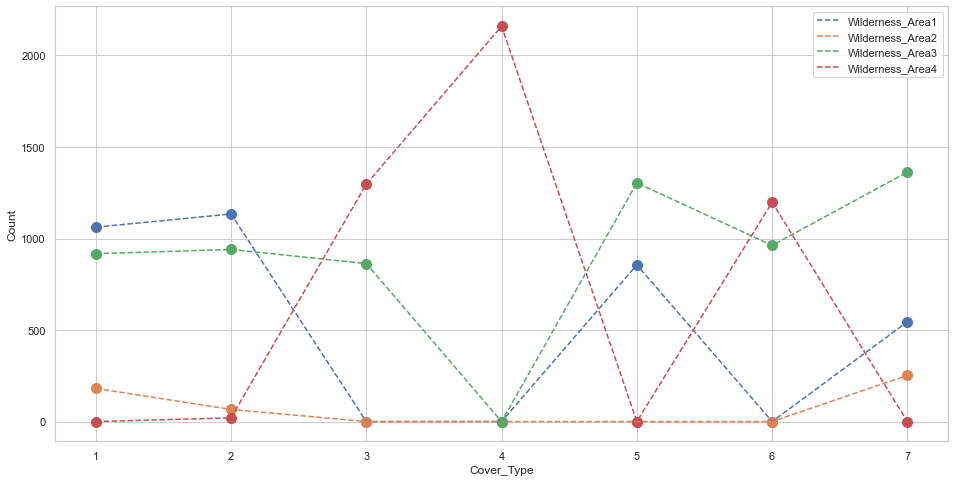

In [36]:
plt.figure(figsize=(16,8))
plt.scatter(list(range(1, 8)),table['Wilderness_Area1'],s=100)
plt.plot(list(range(1, 8)),table['Wilderness_Area1'],'--')
plt.scatter(list(range(1, 8)),table['Wilderness_Area2'],s=100)
plt.plot(list(range(1, 8)),table['Wilderness_Area2'],'--')
plt.scatter(list(range(1, 8)),table['Wilderness_Area3'],s=100)
plt.plot(list(range(1, 8)),table['Wilderness_Area3'],'--')
plt.scatter(list(range(1, 8)),table['Wilderness_Area4'],s=100)
plt.plot(list(range(1, 8)),table['Wilderness_Area4'],'--')

plt.xlabel('Cover_Type')
plt.ylabel('Count')
plt.legend(['Wilderness_Area1','Wilderness_Area2','Wilderness_Area3','Wilderness_Area4'])
plt.show()

We observe the following insights: 
- 	For Wilderness_Area1, the most common tree cover types are 1 and 2. 
- 	Wilderness_Area2 does not generally have a lot of trees.
- 	Wildnerness_Area3 does not present cover_type 4 but presents most of the tree types.
- 	Wilderness_Area4 presents more of cover_type 4.

In [37]:
df['Soil_Type'] = (df.iloc[:, 14:54] == 1).idxmax(1)
#wilderness_areas = df['Soil_Type'].value_counts().index.tolist()
wilderness_soils = (df.iloc[:, 14:54]).keys()

cover_types = sorted(df['Cover_Type'].value_counts().index.tolist())
table_soil_wilderness = pd.DataFrame()

table_soil = pd.DataFrame()

for area in wilderness_soils:
    type_area = df[df['Soil_Type'] == area]
    area_type = []
    for cover in cover_types:
        at_num = type_area[type_area['Cover_Type'] == cover]['Elevation'].count() 
        area_type.append(at_num)   
    table_soil[area.split('_')[1]] = area_type
    
table_soil

Type1  Type2  Type3  Type4  Type5  Type6  Type7  Type8  Type9  Type10  ...  \
0      0      0      0      5      0      0      0      0      1       9  ...   
1      0      3     12     20      0      7      0      1      9      81  ...   
2    121    283    133    462     55    248      0      0      0     717  ...   
3    139     94    799    133     39    244      0      0      0     170  ...   
4      0     61      0    129      0      0      0      0      0      64  ...   
5     95    182     18     87     71    151      0      0      0    1101  ...   
6      0      0      0      7      0      0      0      0      0       0  ...   

   Type31  Type32  Type33  Type34  Type35  Type36  Type37  Type38  Type39  \
0     114     230     184       0       3       0       0      80      79   
1      97     255     184      12       1       2       0       7       3   
2       0       5       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4      87     100     115       4       0       0       0       0       0   
5       7      30      66       2       0       0       0       0       0   
6      27      70      67       4      98       8      34     641     575   

   Type40  
0      49  
1       3  
2       0  
3       0  
4       0  
5       0  
6     407  

[7 rows x 40 columns]

In [38]:
(table_soil.idxmax())+1

Type1     4
Type2     3
Type3     4
Type4     3
Type5     6
Type6     3
Type7     1
Type8     2
Type9     2
Type10    6
Type11    5
Type12    2
Type13    5
Type14    4
Type15    1
Type16    4
Type17    4
Type18    5
Type19    5
Type20    2
Type21    1
Type22    1
Type23    1
Type24    1
Type25    2
Type26    5
Type27    1
Type28    2
Type29    2
Type30    5
Type31    1
Type32    2
Type33    1
Type34    2
Type35    7
Type36    7
Type37    7
Type38    7
Type39    7
Type40    7
dtype: int64

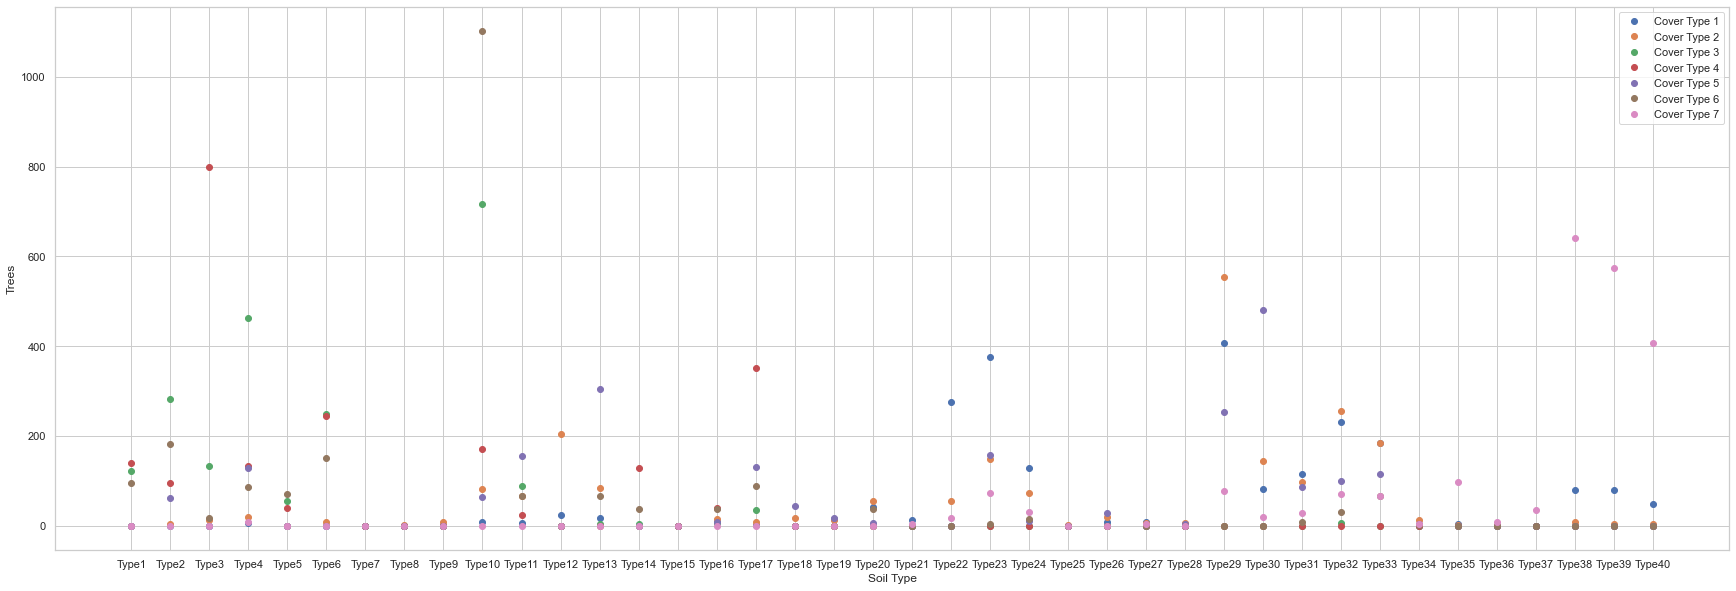

In [39]:
plt.figure(figsize=(30,10))
plt.plot(table_soil.T,'o',100)
#plt.plot(table_soil.T,'--')
plt.xlabel('Soil Type')
plt.ylabel('Trees')
#plt.xlim([-10,10])
plt.legend(['Cover Type 1','Cover Type 2','Cover Type 3','Cover Type 4','Cover Type 5','Cover Type 6','Cover Type 7'])
plt.show()

We observe the following insights:
- 	Soil Type 10 presents a lot of trees of cover type 6. Most of the trees use type 10 soil. 
- 	Soil Type 3 presents a lot of trees of cover type 4.

In [40]:
df['Wilderness_Area_Type'] = (df.iloc[:,10:14] == 1).idxmax(1)
wilderness_areas = sorted(df['Wilderness_Area_Type'].value_counts().index.tolist())

df['Soil_Type'] = (df.iloc[:, 14:54] == 1).idxmax(1)
cover_types = (df.iloc[:, 14:54]).keys()
table_soil_wilderness = pd.DataFrame()

for area in wilderness_areas:
    type_area = df[df['Wilderness_Area_Type'] == area]
    area_soil = []
    for cover in cover_types:
        at_num = type_area[type_area['Soil_Type'] == cover]['Elevation'].count() 
        area_soil.append(at_num)       
    table_soil_wilderness[area] = area_soil
    
table_soil_wilderness

Wilderness_Area1  Wilderness_Area2  Wilderness_Area3  Wilderness_Area4
0                  0                 0                 0               355
1                  0                 0               342               281
2                  0                 0                76               886
3                  0                 0               649               194
4                  0                 0                 0               165
5                  0                 0                 0               650
6                  0                 0                 0                 0
7                  1                 0                 0                 0
8                 10                 0                 0                 0
9                  0                 0               660              1482
10                 0                 0               333                73
11               227                 0                 0                 0
12                 0                 2               474                 0
13                 0                 0                17               152
14                 0                 0                 0                 0
15                30                 0                28                56
16                 0                 0               231               381
17                60                 0                 0                 0
18                21                 3                22                 0
19                75                 2                62                 0
20                 0                 0                16                 0
21               200                51                94                 0
22               354                65               338                 0
23                42                40               175                 0
24                 0                 1                 0                 0
25                 0                 0                54                 0
26                 0                 0                15                 0
27                 0                 0                 9                 0
28              1290                 1                 0                 0
29               725                 0                 0                 0
30                 0                 4               328                 0
31                 0                36               654                 0
32                 0                34               582                 0
33                 0                 0                22                 0
34                28                 6                68                 0
35                 0                 0                10                 0
36                28                 0                 6                 0
37               219                73               436                 0
38               186                38               433                 0
39               101               143               215                 0

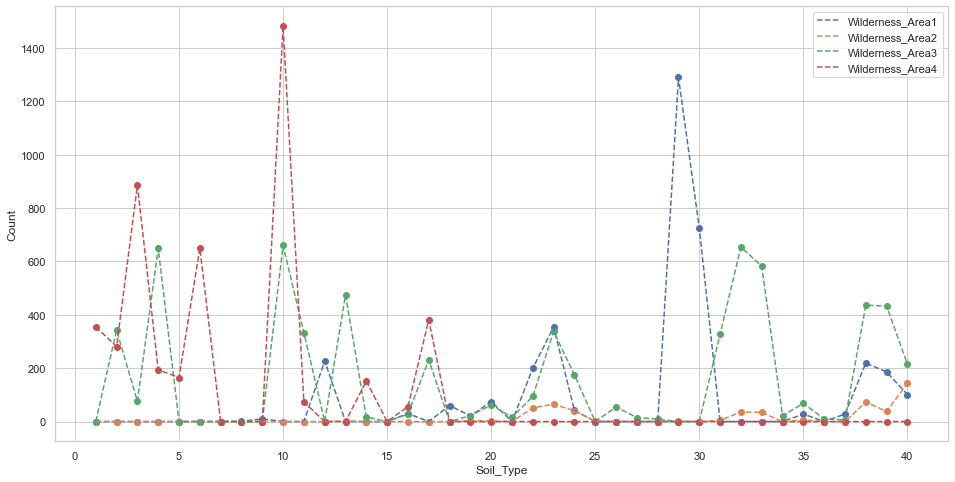

In [41]:
plt.figure(figsize=(16,8))
plt.scatter(list(range(1, 41)),table_soil_wilderness['Wilderness_Area1'])
plt.plot(list(range(1, 41)),table_soil_wilderness['Wilderness_Area1'],'--')
plt.scatter(list(range(1, 41)),table_soil_wilderness['Wilderness_Area2'])
plt.plot(list(range(1, 41)),table_soil_wilderness['Wilderness_Area2'],'--')
plt.scatter(list(range(1, 41)),table_soil_wilderness['Wilderness_Area3'])
plt.plot(list(range(1, 41)),table_soil_wilderness['Wilderness_Area3'],'--')
plt.scatter(list(range(1, 41)),table_soil_wilderness['Wilderness_Area4'])
plt.plot(list(range(1, 41)),table_soil_wilderness['Wilderness_Area4'],'--')
plt.xlabel('Soil_Type')
plt.ylabel('Count')
plt.legend(['Wilderness_Area1','Wilderness_Area2','Wilderness_Area3','Wilderness_Area4'])
plt.show()

We observe the following insights:
- 	The blue peak represents cover type 29 and is clearly the most common in Area 1. 
- 	The red peak represents cover type 10 and is clearly the most in Area 4.
- 	Wilderness Area 2 once again shows that it does not have a lot of trees.

<a id='4'></a>

## 3. Feature Engineering: creating new features and cleaning the data

1. Handling outliers
2. Dropping irrelevant features
3. Creating feature combinations
4. Preprocessing pipeline
5. Checking feature importance
6. Applying PCA

In [42]:
#Importing needed libraries
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (
    OneHotEncoder, StandardScaler, RobustScaler, MinMaxScaler)
from sklearn.impute import (
    SimpleImputer, KNNImputer)
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import IsolationForest
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector
from sklearn.preprocessing import FunctionTransformer
import sklearn
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression


sklearn.set_config(display="diagram")

**Note**: We import the data again in case we made any changes during the data exploratory analysis.

In [45]:
df = pd.read_csv('Train.csv',sep=',', index_col='Id')
y = df['Cover_Type']
X = df.drop(columns='Cover_Type')
#X.dtypes

#### Handling Outliers

**1. No Isolation Forest, based on IQR**

In [46]:
X = df.drop(columns='Cover_Type')
for i in X.iloc[:,0:10].columns:
    if outlier_function(X, i)[2] > 0:
        print("There are {} outliers in {}".format(outlier_function(X, i)[2], i))

There are 53 outliers in Horizontal_Distance_To_Hydrology
There are 49 outliers in Vertical_Distance_To_Hydrology
There are 3 outliers in Horizontal_Distance_To_Roadways
There are 7 outliers in Hillshade_9am
There are 20 outliers in Hillshade_Noon
There are 132 outliers in Horizontal_Distance_To_Fire_Points


**2. With Isolation Forest**

In [47]:
y = df['Cover_Type']
X = df.drop(columns='Cover_Type')
iso_05 = IsolationForest(contamination=0.05)
yhat_05 = iso_05.fit_predict(X)
# select all rows that are not outliers
mask_05 = yhat_05 != -1
X_05, y_05 = X.iloc[mask_05, :], y.iloc[mask_05]

for i in pd.DataFrame(X_train).iloc[:,0:10].columns:
    if outlier_function(pd.DataFrame(X_train), i)[2] > 0:
        print("There are {} outliers in {}".format(outlier_function(pd.DataFrame(X_train), i)[2], i))

There are 19 outliers in 3
There are 3 outliers in 4
There are 6 outliers in 5
There are 3 outliers in 6
There are 1 outliers in 7
There are 68 outliers in 9


**Comparison of both techniques**

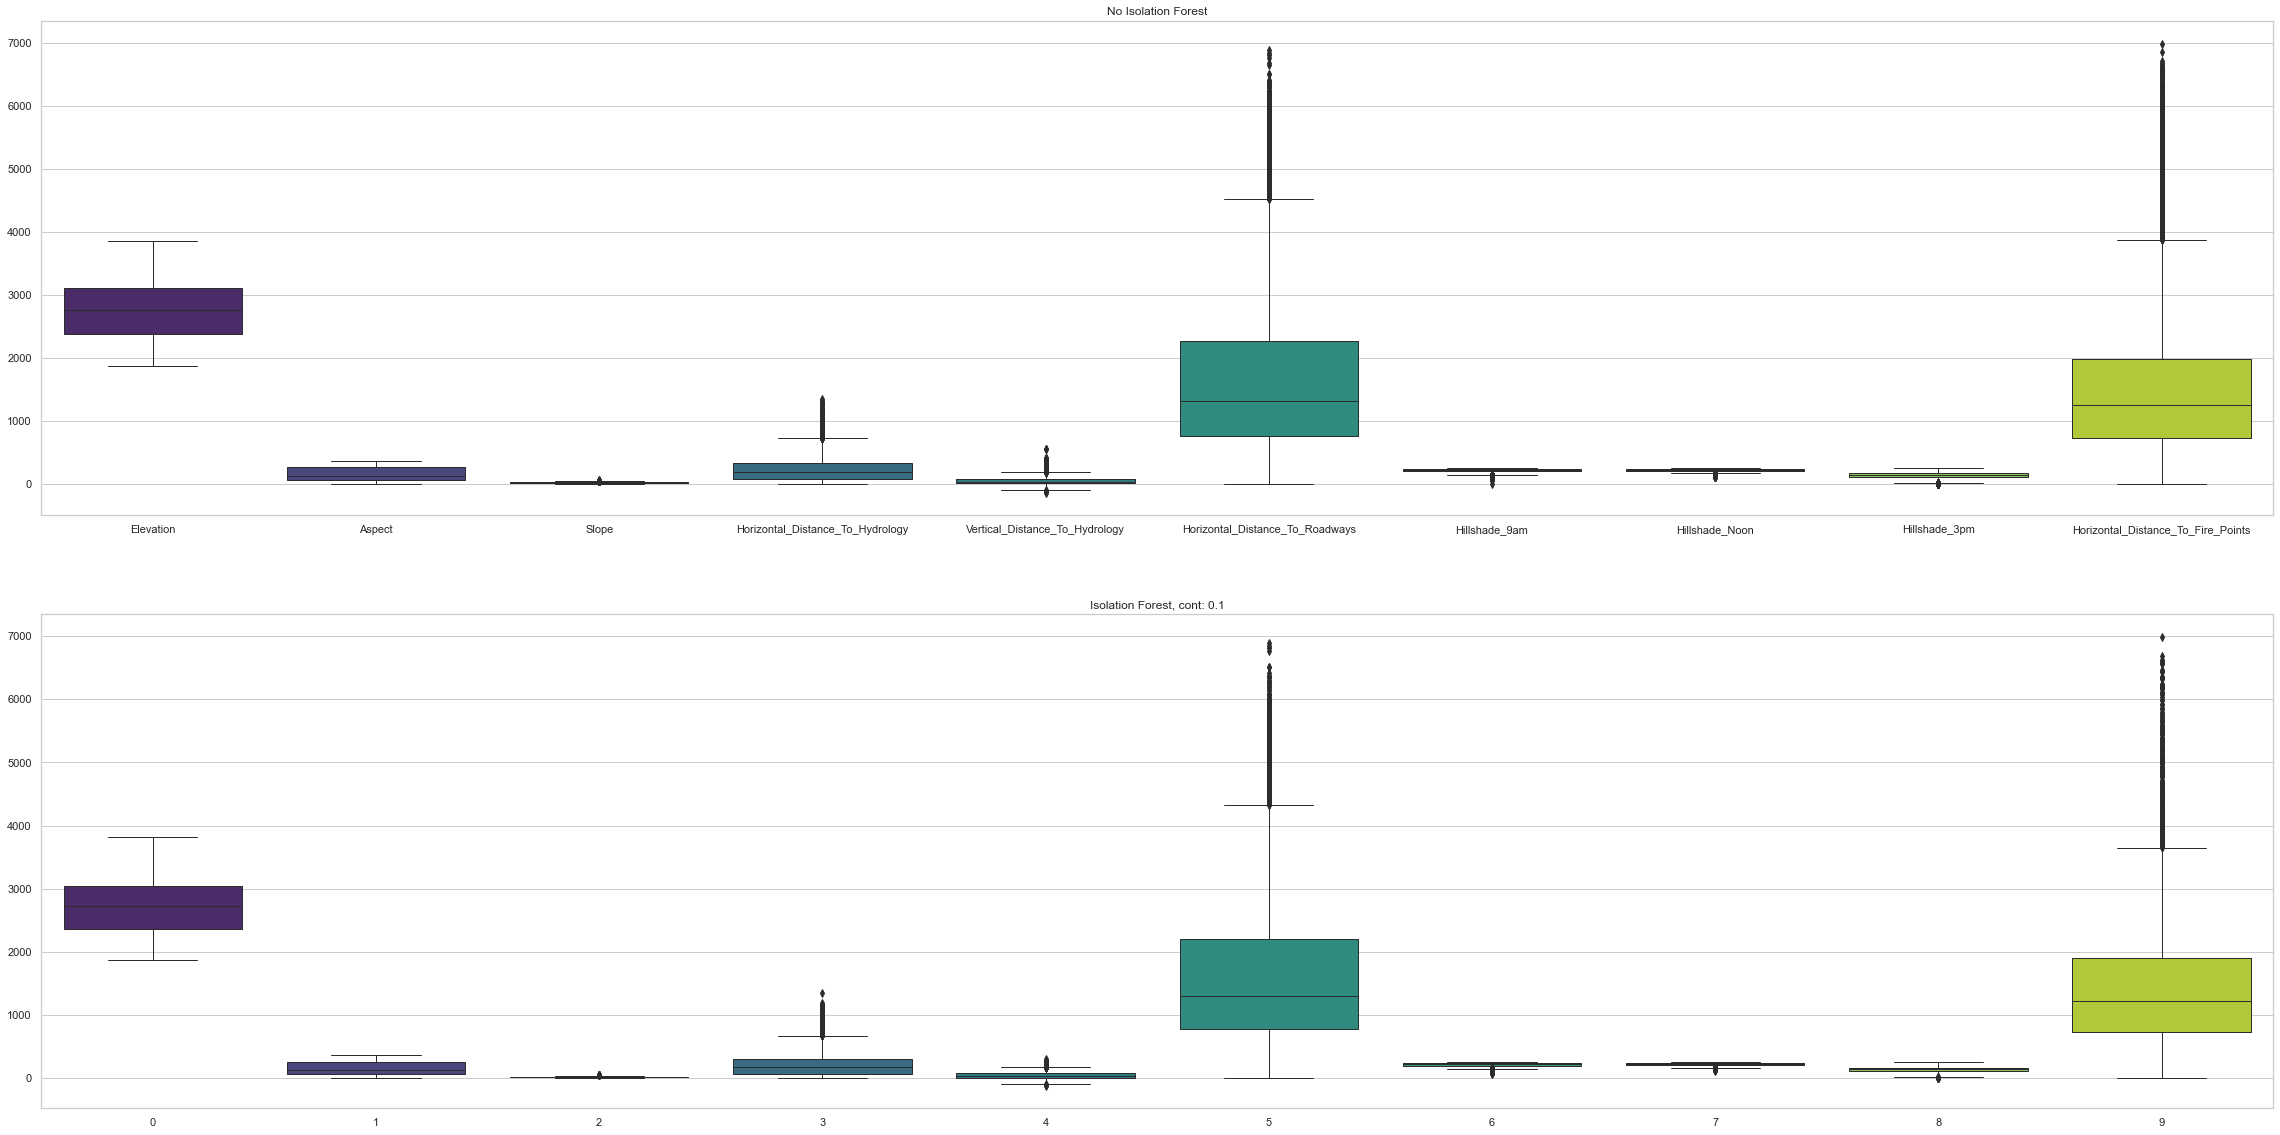

In [48]:
fig, axes = plt.subplots(2, 1, figsize=(40, 20))
seaborn.set(style='whitegrid')
seaborn.boxplot(data=X.iloc[:,0:10],linewidth=1, ax=axes[0], palette='viridis')
axes[0].set_title('No Isolation Forest')

seaborn.boxplot(data=X_train[:,0:10],linewidth=1, ax=axes[1], palette='viridis')
axes[1].set_title('Isolation Forest, cont: 0.1')
plt.show()

In [49]:
# Drop outliers with 0.1 contamination
print(X.shape)
iso = IsolationForest(contamination=0.1)
yhat = iso.fit_predict(X)
# select all rows that are not outliers
mask = yhat != -1
X, y = X.iloc[mask, :], y.iloc[mask]
print(X.shape)

(15120, 54)
(13608, 54)


In [50]:
# Drop outliers with 0.5 contamination
iso_05 = IsolationForest(contamination=0.5)
yhat_05 = iso_05.fit_predict(X)
# select all rows that are not outliers
mask_05 = yhat_05 != -1
X_05, y_05 = X.iloc[mask_05, :], y.iloc[mask_05]

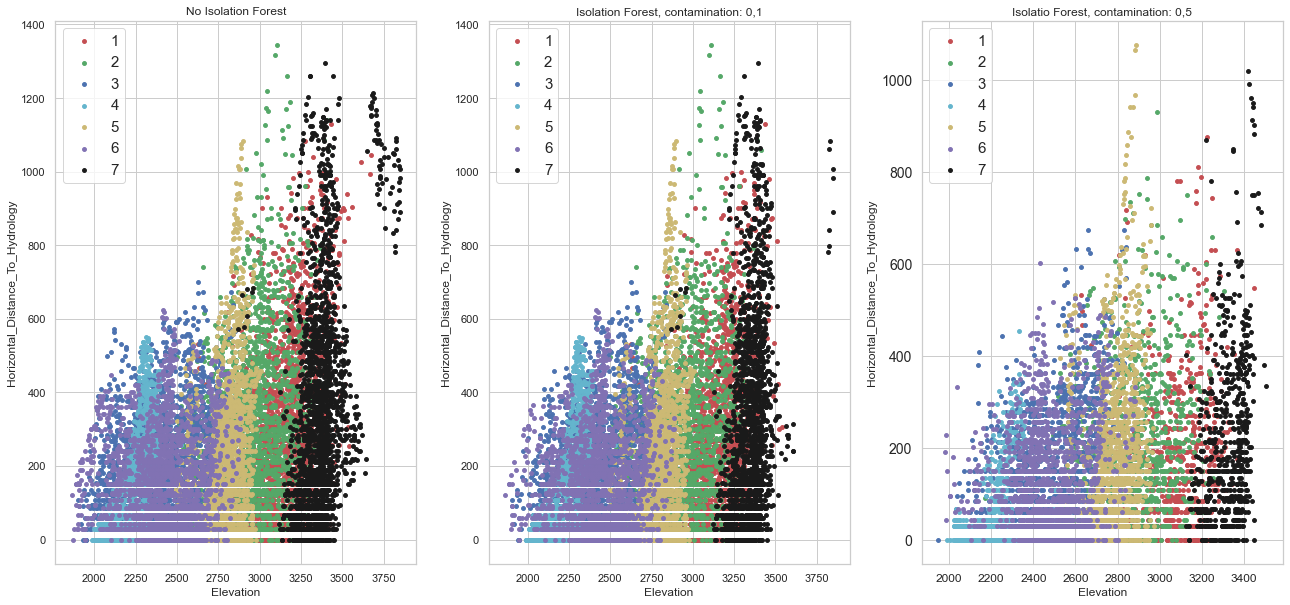

In [51]:
import matplotlib.pyplot as plt

fig, (ax_1, ax_2, ax_3) = plt.subplots(ncols=3, figsize =(22,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
targets = [1,2,3,4,5,6,7]
colors = ['r', 'g', 'b', 'c', 'y', 'm', 'k']

# No Isolation Forest
for target, color in zip(targets,colors):
    indicesToKeep = df['Cover_Type'] == target
    ax_1.scatter(df.loc[indicesToKeep, 'Elevation']
               , df.loc[indicesToKeep, 'Horizontal_Distance_To_Hydrology'], c = color, s = 15)
ax_1.legend(targets,prop={'size': 15})
ax_1.set_title('No Isolation Forest')
ax_1.set_xlabel('Elevation',fontsize=12)
ax_1.set_ylabel('Horizontal_Distance_To_Hydrology',fontsize=12)

# Isolation Forest with contamination = 0,5
for target, color in zip(targets,colors):
    indicesToKeep = df['Cover_Type'] == target
    ax_3.scatter(X_05.loc[indicesToKeep, 'Elevation']
               , X_05.loc[indicesToKeep, 'Horizontal_Distance_To_Hydrology'], c = color, s = 15)
ax_3.legend(targets,prop={'size': 15})
ax_3.set_title('Isolatio Forest, contamination: 0,5')
ax_3.set_xlabel('Elevation',fontsize=12)
ax_3.set_ylabel('Horizontal_Distance_To_Hydrology',fontsize=12)

# Isolation Forest with contamination = 0,1
for target, color in zip(targets,colors):
    indicesToKeep = y == target
    ax_2.scatter(X.loc[indicesToKeep, 'Elevation']
               , X.loc[indicesToKeep, 'Horizontal_Distance_To_Hydrology'], c = color, s = 15)
ax_2.legend(targets,prop={'size': 15})
ax_2.set_title('Isolation Forest, contamination: 0,1')
ax_2.set_xlabel('Elevation',fontsize=12)
ax_2.set_ylabel('Horizontal_Distance_To_Hydrology',fontsize=12)
plt.show()

Our proposed method takes advantage of 3 anomalies' quantitative properties: 
* they are the majority consisting of fewer instances and 
* they have attribute-values that are very different from those of normal instances.

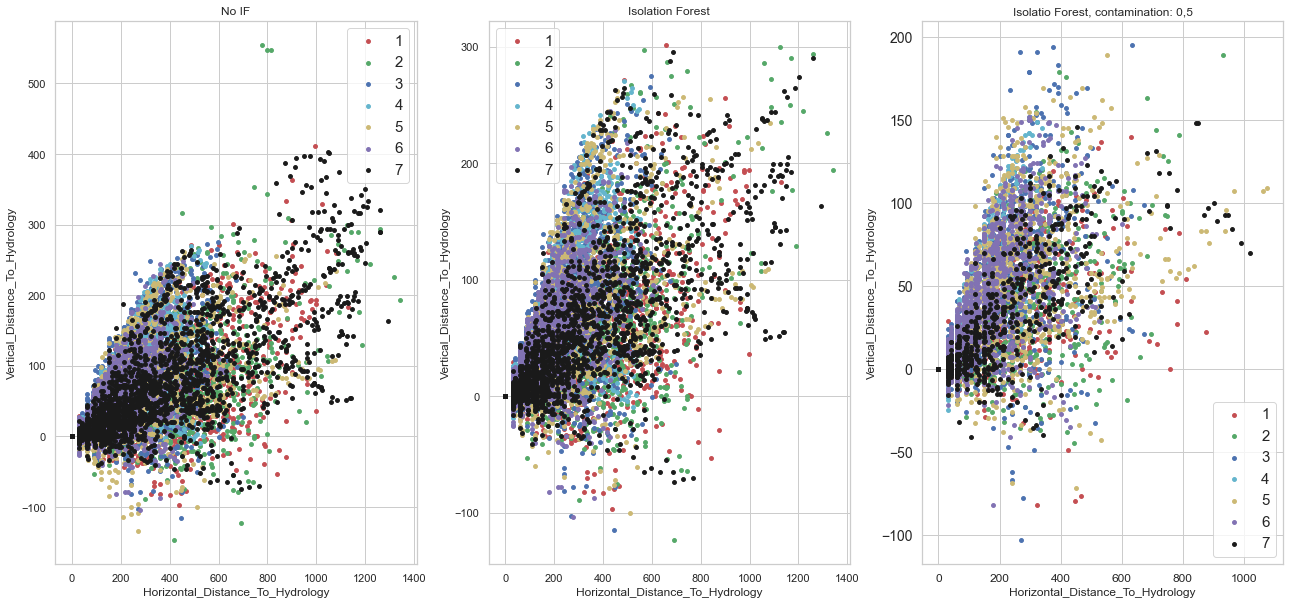

In [52]:
import matplotlib.pyplot as plt
fig, (ax_1, ax_2, ax_3) = plt.subplots(ncols=3, figsize =(22,10))
#plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
targets = [1,2,3,4,5,6,7]
colors = ['r', 'g', 'b', 'c', 'y', 'm', 'k']
plt.xlabel('Elevation',fontsize=20)
plt.ylabel('Horizontal_Distance_To_Hydrology',fontsize=20)

# No Isolation Forest
for target, color in zip(targets,colors):
    indicesToKeep = df['Cover_Type'] == target
    ax_1.scatter(df.loc[indicesToKeep, 'Horizontal_Distance_To_Hydrology']
               , df.loc[indicesToKeep, 'Vertical_Distance_To_Hydrology'], c = color, s = 15)
ax_1.legend(targets,prop={'size': 15})
ax_1.set_title('No IF')
ax_1.set_xlabel('Horizontal_Distance_To_Hydrology',fontsize=12)
ax_1.set_ylabel('Vertical_Distance_To_Hydrology',fontsize=12)

# Isolation Forest with contamination = 0,1
for target, color in zip(targets,colors):
    indicesToKeep = y== target
    ax_2.scatter(X.loc[indicesToKeep, 'Horizontal_Distance_To_Hydrology']
               , X.loc[indicesToKeep, 'Vertical_Distance_To_Hydrology'], c = color, s = 15)

ax_2.legend(targets,prop={'size': 15})
ax_2.set_title('Isolation Forest')
ax_2.set_xlabel('Horizontal_Distance_To_Hydrology',fontsize=12)
ax_2.set_ylabel('Vertical_Distance_To_Hydrology',fontsize=12)

# Isolation Forest with contamination = 0,5
for target, color in zip(targets,colors):
    indicesToKeep = df['Cover_Type'] == target
    ax_3.scatter(X_05.loc[indicesToKeep, 'Horizontal_Distance_To_Hydrology']
               , X_05.loc[indicesToKeep, 'Vertical_Distance_To_Hydrology'], c = color, s = 15)
ax_3.legend(targets,prop={'size': 15})
ax_3.set_title('Isolatio Forest, contamination: 0,5')
ax_3.set_xlabel('Horizontal_Distance_To_Hydrology',fontsize=12)
ax_3.set_ylabel('Vertical_Distance_To_Hydrology',fontsize=12)
plt.show()

#### Dropping irrelevant features

In [53]:
#Function to drop soil columns with 0 values
def drop_soil_columns(series):
    return series.drop(columns=['Soil_Type7','Soil_Type15'])

#### Imputing zero values of `Hillshade_3pm`
To treat the zero values of `Hillshade_3pm` we have 2 options: drop the points and impute the values. Since we have information that can be useful to impute them (`Hillshade_9am`) we chose to impute them. 

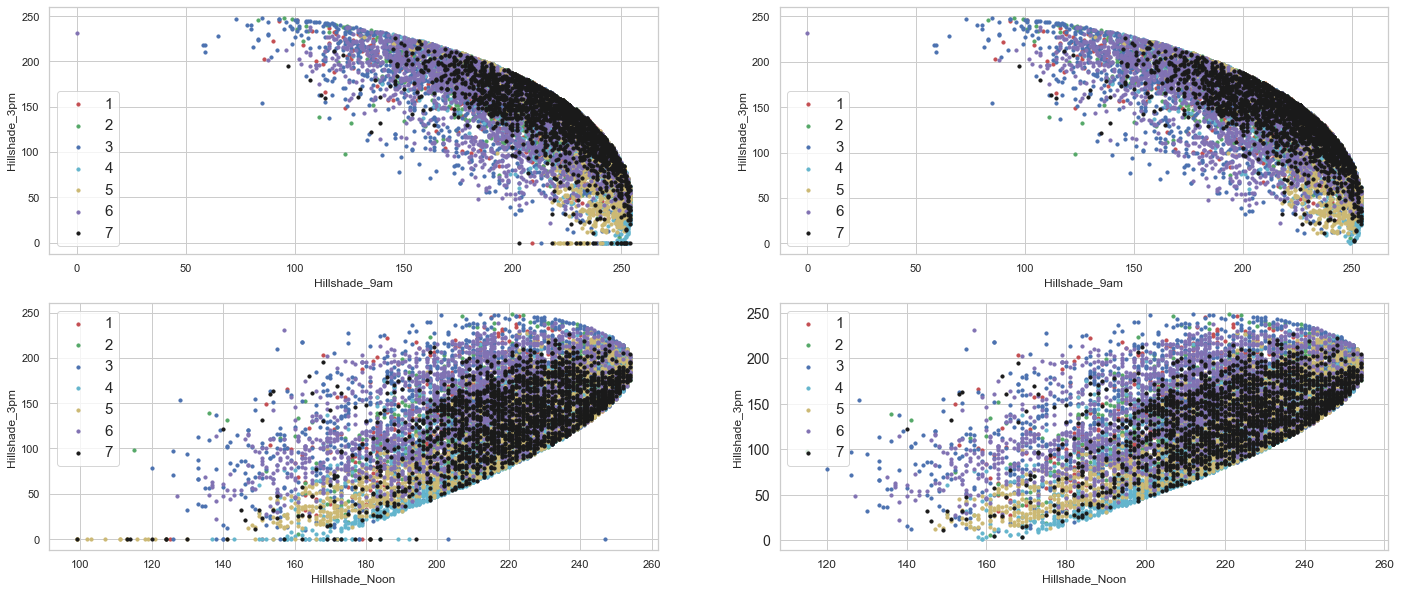

In [54]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize =(24,10))
ax_1 = axes[0,0]
ax_2 = axes[0,1]
ax_3 = axes[1,0]
ax_4 = axes[1,1]
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
targets = [1,2,3,4,5,6,7]
colors = ['r', 'g', 'b', 'c', 'y', 'm', 'k']

for target, color in zip(targets,colors):
    indicesToKeep = df['Cover_Type'] == target
    ax_1.scatter(df.loc[indicesToKeep, 'Hillshade_9am']
               , df.loc[indicesToKeep, 'Hillshade_3pm'], c = color, s = 10)
ax_1.legend(targets,prop={'size': 15})
ax_1.set_xlabel('Hillshade_9am',fontsize=12)
ax_1.set_ylabel('Hillshade_3pm',fontsize=12)

for target, color in zip(targets,colors):
    indicesToKeep = df['Cover_Type'] == target
    ax_3.scatter(df.loc[indicesToKeep, 'Hillshade_Noon']
               , df.loc[indicesToKeep, 'Hillshade_3pm'], c = color, s = 10)
ax_3.legend(targets,prop={'size': 15})
ax_3.set_xlabel('Hillshade_Noon',fontsize=12)
ax_3.set_ylabel('Hillshade_3pm',fontsize=12)

df.loc[df['Hillshade_3pm'] == 0, 'Hillshade_3pm'] = np.nan
df_imputed = df.groupby(['Hillshade_9am','Hillshade_Noon']).apply(lambda x: x.ffill().bfill())

for target, color in zip(targets,colors):
    indicesToKeep = df_imputed['Cover_Type'] == target
    ax_2.scatter(df_imputed.loc[indicesToKeep, 'Hillshade_9am']
               , df_imputed.loc[indicesToKeep, 'Hillshade_3pm'], c = color, s = 10)
ax_2.legend(targets,prop={'size': 15})
ax_2.set_xlabel('Hillshade_9am',fontsize=12)
ax_2.set_ylabel('Hillshade_3pm',fontsize=12)

for target, color in zip(targets,colors):
    indicesToKeep = df_imputed['Cover_Type'] == target
    ax_4.scatter(df_imputed.loc[indicesToKeep, 'Hillshade_Noon']
               , df_imputed.loc[indicesToKeep, 'Hillshade_3pm'], c = color, s = 10)
ax_4.legend(targets,prop={'size': 15})
ax_4.set_xlabel('Hillshade_Noon',fontsize=12)
ax_4.set_ylabel('Hillshade_3pm',fontsize=12)
plt.show()

> The zero values in the Hillshade_3pm are removed (as mentioned previously in Data Cleaning)

#### Creating Feature Combinations

*Note*: Adapted from: https://github.com/cereniyim/Tree-Classification-ML-Model/blob/master/fantastic-trees-where-to-find-how-to-detect-them.ipynb

In [55]:
Ele_plus_VDtHyd = X['Elevation']+X['Vertical_Distance_To_Hydrology']
Hydro_plus_Fire = X['Horizontal_Distance_To_Hydrology']+X['Horizontal_Distance_To_Fire_Points']
Hydro_minus_Fire = X['Horizontal_Distance_To_Hydrology']-X['Horizontal_Distance_To_Fire_Points']
Hydro_plus_Road = X['Horizontal_Distance_To_Hydrology']+X['Horizontal_Distance_To_Roadways']
Hydro_minus_Road = X['Horizontal_Distance_To_Hydrology']-X['Horizontal_Distance_To_Roadways']
Fire_plus_Road = X['Horizontal_Distance_To_Fire_Points']+X['Horizontal_Distance_To_Roadways']
Fire_minus_Road= X['Horizontal_Distance_To_Fire_Points']-X['Horizontal_Distance_To_Roadways']
Elev_to_HD_Hyd= X['Elevation'] - 0.2 * X['Horizontal_Distance_To_Hydrology']
Elev_to_HD_Road =X['Elevation'] - 0.05 * X['Horizontal_Distance_To_Roadways'] 
Elev_to_VD_Hyd =X['Elevation'] - X['Vertical_Distance_To_Hydrology']
Mean_Amenities=(X['Horizontal_Distance_To_Fire_Points'] + X['Horizontal_Distance_To_Hydrology'] + X['Horizontal_Distance_To_Roadways']) / 3
Mean_Fire_Hyd =(X['Horizontal_Distance_To_Fire_Points'] + X['Horizontal_Distance_To_Hydrology']) / 2 

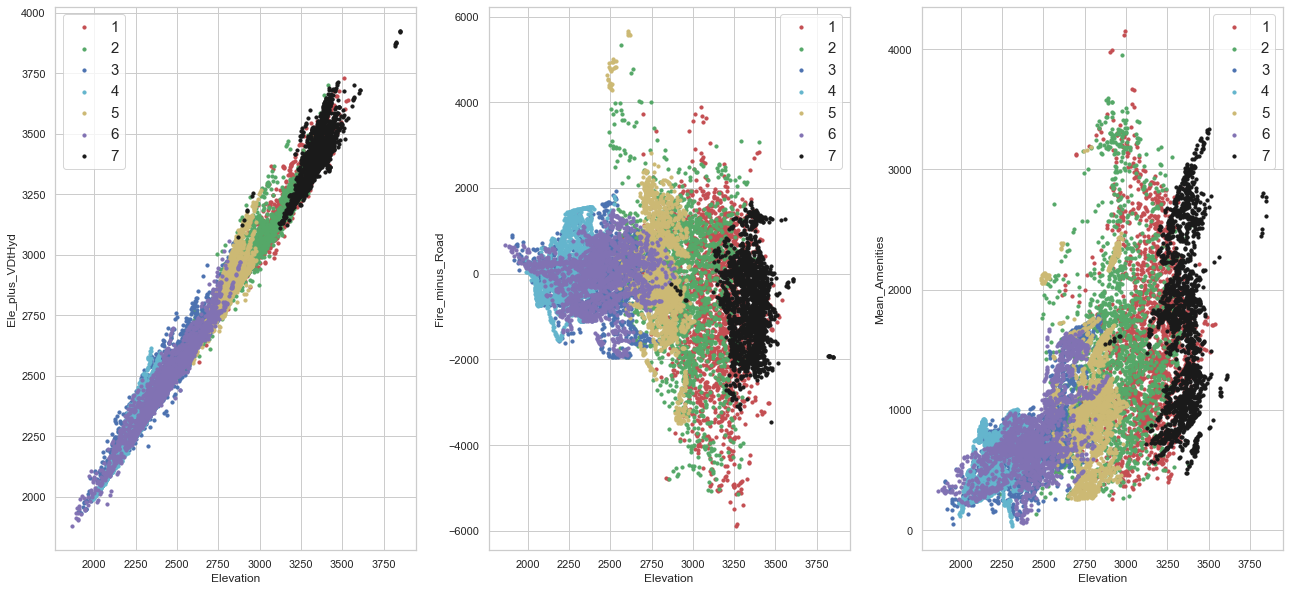

In [56]:
import matplotlib.pyplot as plt
fig, (ax_1, ax_2, ax_3) = plt.subplots(ncols=3, figsize =(22,10))
targets = [1,2,3,4,5,6,7]
colors = ['r', 'g', 'b', 'c', 'y', 'm', 'k']


for target, color in zip(targets,colors):
    indicesToKeep = y == target
    ax_1.scatter(X.loc[indicesToKeep, 'Elevation']
               ,Ele_plus_VDtHyd[indicesToKeep], c = color, s = 10)
    
ax_1.legend(targets,prop={'size': 15})
ax_1.set_xlabel('Elevation',fontsize=12)
ax_1.set_ylabel('Ele_plus_VDtHyd',fontsize=12)

for target, color in zip(targets,colors):
    indicesToKeep = y == target
    ax_2.scatter(X.loc[indicesToKeep, 'Elevation']
               ,Fire_minus_Road[indicesToKeep], c = color, s = 10)

ax_2.legend(targets,prop={'size': 15})
ax_2.set_xlabel('Elevation',fontsize=12)
ax_2.set_ylabel('Fire_minus_Road',fontsize=12)

#Combining 2 features:
for target, color in zip(targets,colors):
    indicesToKeep = y == target
    ax_3.scatter(X.loc[indicesToKeep, 'Elevation']
               ,Mean_Amenities[indicesToKeep], c = color, s = 10)

ax_3.legend(targets,prop={'size': 15})
ax_3.set_xlabel('Elevation',fontsize=12)
ax_3.set_ylabel('Mean_Amenities',fontsize=12)
plt.show()

> Combining features we can obtain more information about the Cover Types.


**Combining soil columns that share the same words**. 

Reminder: We also check if we maintain the boolean types (min: 0, max: 1)

In [57]:
(X['Soil_Type21']+X['Soil_Type23']).describe()

count    13608.000000
mean         0.054674
std          0.227351
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
dtype: float64

In [58]:
(X['Soil_Type33']+X['Soil_Type32']).describe()

count    13608.000000
mean         0.089139
std          0.284954
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
dtype: float64

#### Basic Prepreprocessing Pipeline
The preprocess step includes the following:
* Dropping the two soil columns that do not contain any information.
* Imputing zero values of Hillshade_3pm
* Creating new variables that add information to our model
* Dropping outliers using Isolation Forest technique.

When this is done, we must scale the numerical columns of the data using the MinMaxScaler().

We, once again, import the data to try the pipeline from the start.

In [60]:
df = pd.read_csv('Train.csv',sep=',', index_col='Id')
df.loc[df['Hillshade_3pm'] == 0, 'Hillshade_3pm'] = np.nan
df = df.groupby(['Hillshade_9am']).apply(lambda x: x.ffill().bfill())

In [61]:
y = df['Cover_Type']
X = df.drop(columns='Cover_Type')
X = drop_soil_columns(X)

In [62]:
# Combine and drop features
X['Soil_Type32_33'] = X['Soil_Type32']+ X['Soil_Type33']
X = X.drop(columns=['Soil_Type32','Soil_Type33'])

X['Soil_Type21_23'] = X['Soil_Type21']+ X['Soil_Type23']
X = X.drop(columns=['Soil_Type21','Soil_Type23'])

# add columns
#X['Euclidian_Distance_To_Hydrology'] = (X['Horizontal_Distance_To_Hydrology']*2 + X['Vertical_Distance_To_Hydrology']2)*0.5
#X['Mean_Elevation_Vertical_Distance_Hydrology'] = (X['Elevation'] + X['Vertical_Distance_To_Hydrology'])/2
#X['Mean_Distance_Hydrology_Firepoints'] = (X['Horizontal_Distance_To_Hydrology'] + X ['Horizontal_Distance_To_Fire_Points'])/2
#X['Mean_Distance_Hydrology_Roadways'] = (X['Horizontal_Distance_To_Hydrology'] + X['Horizontal_Distance_To_Roadways'])/2
#X['Mean_Distance_Firepoints_Roadways'] = (X['Horizontal_Distance_To_Fire_Points'] +  X['Horizontal_Distance_To_Roadways'])/2
#X['sqrt' + 'Mean_Distance_Hydrology_Roadways'] = np.sqrt(X['Mean_Distance_Hydrology_Roadways'])

X['Ele_plus_VDtHyd'] = X['Elevation']+X['Vertical_Distance_To_Hydrology']
X['Hydro_plus_Fire'] = X['Horizontal_Distance_To_Hydrology']+X['Horizontal_Distance_To_Fire_Points']
X['Hydro_minus_Fire'] = X['Horizontal_Distance_To_Hydrology']-X['Horizontal_Distance_To_Fire_Points']
X['Hydro_plus_Road'] = X['Horizontal_Distance_To_Hydrology']+X['Horizontal_Distance_To_Roadways']
X['Hydro_minus_Road'] = X['Horizontal_Distance_To_Hydrology']-X['Horizontal_Distance_To_Roadways']
X['Fire_plus_Road'] = X['Horizontal_Distance_To_Fire_Points']+X['Horizontal_Distance_To_Roadways']
X['Fire_minus_Road'] = X['Horizontal_Distance_To_Fire_Points']-X['Horizontal_Distance_To_Roadways']
X['Elev_to_HD_Hyd']=X['Elevation'] - 0.2 * X['Horizontal_Distance_To_Hydrology']
X['Elev_to_HD_Road']=X['Elevation'] - 0.05 * X['Horizontal_Distance_To_Roadways'] 
X['Elev_to_VD_Hyd']=X['Elevation'] - X['Vertical_Distance_To_Hydrology']
X['Mean_Amenities']=(X['Horizontal_Distance_To_Fire_Points'] + X['Horizontal_Distance_To_Hydrology'] + X['Horizontal_Distance_To_Roadways']) / 3
X['Mean_Fire_Hyd']=(X['Horizontal_Distance_To_Fire_Points'] + X['Horizontal_Distance_To_Hydrology']) / 2 

X['Net_Distance_To_Hydrology'] = np.sqrt(X["Vertical_Distance_To_Hydrology"]*2 + X["Horizontal_Distance_To_Hydrology"]*2)
#X = X.drop(columns=['Vertical_Distance_To_Hydrology','Horizontal_Distance_To_Hydrology'])
#boolean = X.iloc[:,10:50].keys().tolist()

In [63]:
boolean = X.iloc[:,10:50].keys().tolist()
X.iloc[:,10:50].describe()

Wilderness_Area1  Wilderness_Area2  Wilderness_Area3  Wilderness_Area4  \
count      15120.000000      15120.000000      15120.000000      15120.000000   
mean           0.237897          0.033003          0.419907          0.309193   
std            0.425810          0.178649          0.493560          0.462176   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000          0.000000   
75%            0.000000          0.000000          1.000000          1.000000   
max            1.000000          1.000000          1.000000          1.000000   

         Soil_Type1    Soil_Type2    Soil_Type3    Soil_Type4    Soil_Type5  \
count  15120.000000  15120.000000  15120.000000  15120.000000  15120.000000   
mean       0.023479      0.041204      0.063624      0.055754      0.010913   
std        0.151424      0.198768      0.244091      0.229454      0.103896   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

         Soil_Type6  ...   Soil_Type31   Soil_Type34   Soil_Type35  \
count  15120.000000  ...  15120.000000  15120.000000  15120.000000   
mean       0.042989  ...      0.021958      0.001455      0.006746   
std        0.202840  ...      0.146550      0.038118      0.081859   
min        0.000000  ...      0.000000      0.000000      0.000000   
25%        0.000000  ...      0.000000      0.000000      0.000000   
50%        0.000000  ...      0.000000      0.000000      0.000000   
75%        0.000000  ...      0.000000      0.000000      0.000000   
max        1.000000  ...      1.000000      1.000000      1.000000   

        Soil_Type36   Soil_Type37   Soil_Type38   Soil_Type39   Soil_Type40  \
count  15120.000000  15120.000000  15120.000000  15120.000000  15120.000000   
mean       0.000661      0.002249      0.048148      0.043452      0.030357   
std        0.025710      0.047368      0.214086      0.203880      0.171574   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

       Soil_Type32_33  Soil_Type21_23  
count    15120.000000    15120.000000  
mean         0.086376        0.051124  
std          0.280927        0.220259  
min          0.000000        0.000000  
25%          0.000000        0.000000  
50%          0.000000        0.000000  
75%          0.000000        0.000000  
max          1.000000        1.000000  

[8 rows x 40 columns]

In [64]:
# Drop outliers with 0.1 contamination
print(X.shape)
iso = IsolationForest(contamination=0.05)
yhat = iso.fit_predict(X)
# select all rows that are not outliers
mask = yhat != -1
X, y = X.iloc[mask, :], y.iloc[mask]
print(X.shape)
#X.describe()

(15120, 63)
(14364, 63)


In [65]:
ct = ColumnTransformer([
    ("scale", MinMaxScaler(), ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points','Ele_plus_VDtHyd', 'Hydro_plus_Fire', 'Hydro_minus_Fire',
       'Hydro_plus_Road', 'Hydro_minus_Road', 'Fire_plus_Road',
       'Fire_minus_Road', 'Elev_to_HD_Hyd', 'Elev_to_HD_Road',
       'Elev_to_VD_Hyd', 'Mean_Amenities', 'Mean_Fire_Hyd',
       'Net_Distance_To_Hydrology']),
    ('passthrough_numerical','passthrough',boolean),
        
])
#X.shape

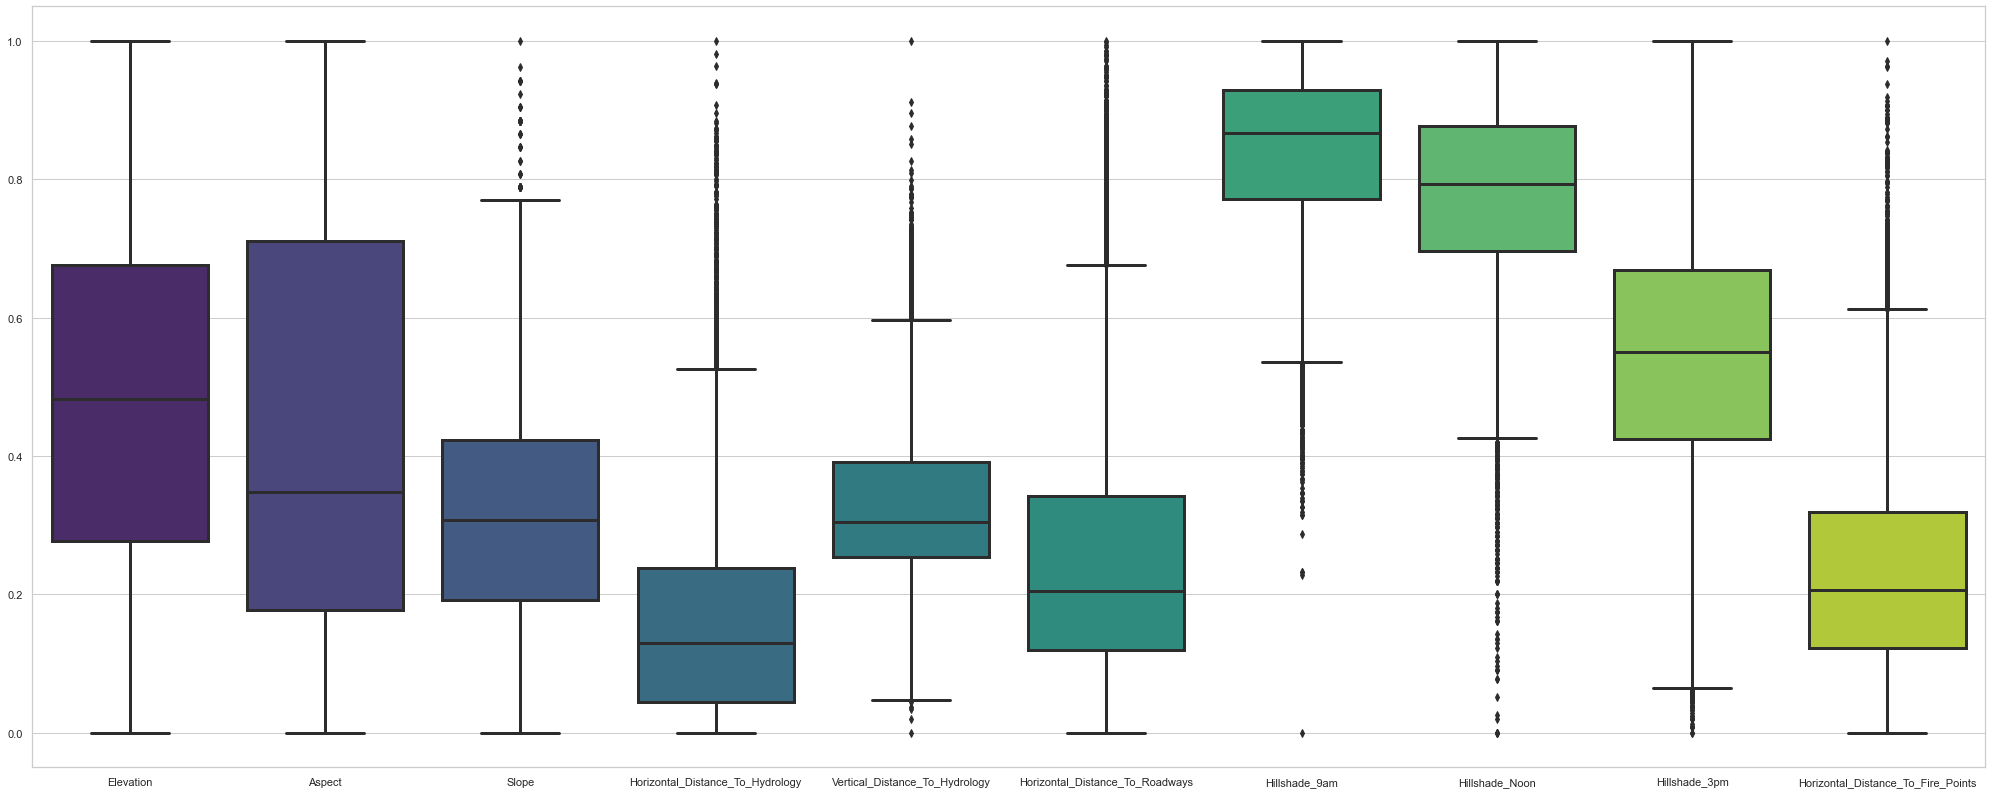

In [66]:
# Check if the pre processing step is doing what we want
X_preprocessed = pd.DataFrame(data = ct.fit_transform(X),columns=X.keys())

fig, axes = plt.subplots(1, figsize=(35, 14))
seaborn.set(style='whitegrid')
seaborn.boxplot(data=X_preprocessed.iloc[:,0:10],linewidth=3, palette='viridis')
plt.show()

#### Regularization methods - Ridge

After all the preprocessing steps, we can use some regularization methods to analyze which features are more important. Ridge is an embedded method focused on applying a regularization penalty to the model complexity. Utilizing this regularization, you can force the model to reduce the attention that it is paying to less relevant features.

The results of the Ridge (L2) regression display the importance of each feature.

In [67]:
ridge_mod = LogisticRegression(max_iter=10000,penalty='l2')
print("Accuracy = {:.4}".format(np.mean(cross_val_score(ridge_mod, X_preprocessed, y, cv=5))))

Accuracy = 0.6566


In [68]:
def get_feature_importance(clf, feature_names):
    """
    Function to print the most important features of a logreg classifier based on the coefficient values
    """
    return pd.DataFrame({'variable': feature_names, # Feature names
                         'coefficient': clf.coef_[0] # Feature Coeficients
                    }) \
    .round(decimals=2) \
    .sort_values('coefficient', ascending=False) \
    .style.bar(color=['red', 'green'], align='zero')

In [69]:
get_feature_importance(ridge_mod.fit(X_preprocessed,y), X_preprocessed.columns.get_level_values(0).tolist())

> Using the results from Ridge we can plot some of the most relevant features (higher coefficients) (not including the boolean ones).

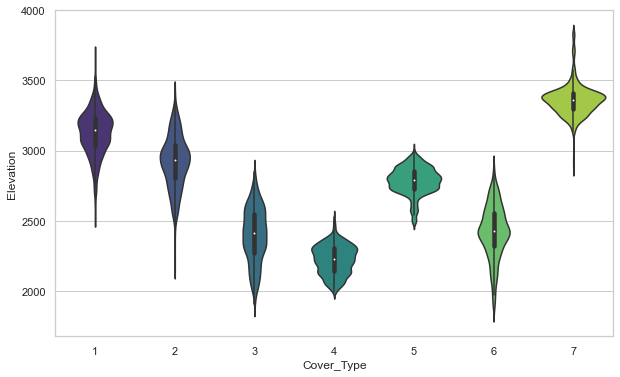

In [70]:
#Most important feature (based on Ridge)
import seaborn as sns
plt.figure(figsize=(10,6))
sns.violinplot(df['Cover_Type'],df['Elevation'],palette="viridis")
plt.show()

<Figure size 432x288 with 0 Axes>

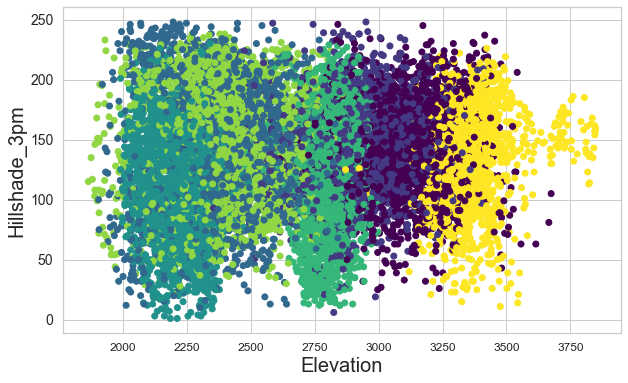

In [71]:
# Using the 2 most important features, that are not boolean
plt.figure()
plt.figure(figsize=(10,6))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Elevation',fontsize=20)
plt.ylabel('Hillshade_3pm',fontsize=20)
#targets = [1,2,3,4,5,6,7]

ax = plt.axes()
ax.scatter(df['Elevation'], df['Hillshade_3pm'], cmap='viridis',c = df['Cover_Type'])
plt.show()

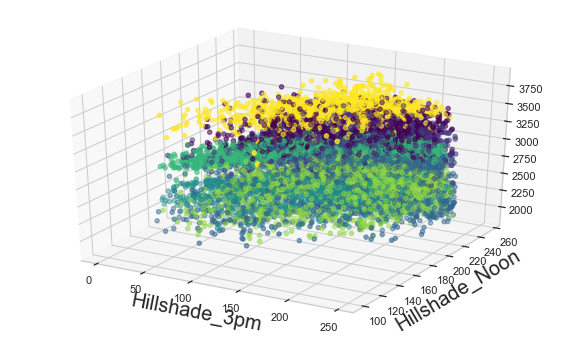

In [72]:
# Using the 3 most important features, that are not boolean
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
 
#fig = plt.figure()
plt.figure(figsize=(10,6))
 
# syntax for 3-D projection
ax = plt.axes(projection ='3d')
plt.xlabel('Hillshade_3pm',fontsize=20)
plt.ylabel('Hillshade_Noon',fontsize=20)
#plt.zlabel('Hillshade_9am',fontsize=20)
 
# defining axes
z = df['Elevation']
x = df['Hillshade_3pm']
y = df['Hillshade_Noon']
c = df['Cover_Type']
ax.scatter(x, y, z, cmap='viridis',c = c)
 
# syntax for plotting

plt.show()
ax.grid(False)

#ax.legend(loc="best")

> Only with Elevation (the most important feature) we are able to differentiate between some cover types. If we add other features such as Hillshade 3pm more information is represented and it is easier to separate the tree groups.

#### PCA
We will try to reduce the dimensionality of the dataset by applying PCA. If we take a look at the correlation matrix, we can see that there are mild correlations between some variables. Since PCA relies on these correlations, it is reasonable to expect that it is going to be able to find a better representation of the data.

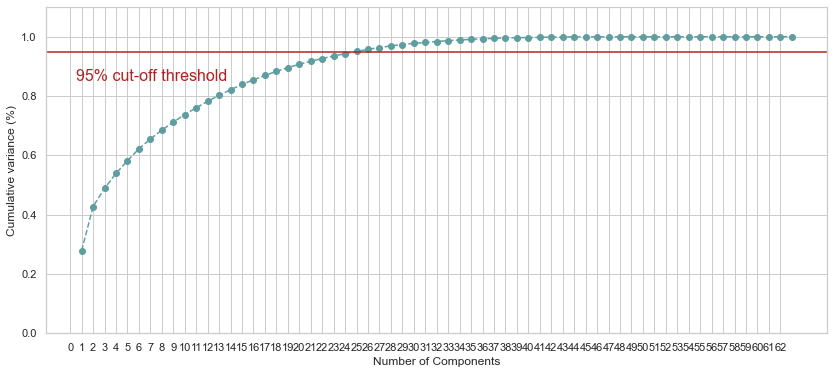

In [73]:
#PCA code
from sklearn.decomposition import PCA
pca_data = PCA()

principalComponents = pca_data.fit_transform(X_preprocessed)

plt.rcParams["figure.figsize"] = (14,6)

fig, ax = plt.subplots()
xi = np.arange(1, 64, step=1)
yi = np.cumsum(pca_data.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, yi, marker='o', linestyle='--', color='cadetblue')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 63, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')

plt.axhline(y=0.95, color='firebrick', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'firebrick', fontsize=16)

plt.show()

> 24 features explain 95 % of the variability of the data

<a id='5'></a>

## 4. Model Training
#### Options for Models
- LDA for Multiclass Classification
- Random Forest Classifier
- SVM 
- KNN (k-nearest nieghbour)
- Multinomial logistic regression
- Ensemble trees
    - Boosting
        xgb_tree = xgboost.XGBClassifier(objective="binary:logistic", verbosity=0, random_state=42)
    - ExtraTree

In [74]:
import sklearn
import numpy as np

#Import the models that we are going to try
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import ExtraTreesClassifier
from  sklearn.ensemble import AdaBoostClassifier
#!pip3 install xgboost
import xgboost as xgb

> We, once again, import the data to run the model and the preprecossing pipeline together.

In [75]:
df = pd.read_csv('Train.csv',sep=',', index_col='Id')

In [76]:
df.loc[df['Hillshade_3pm'] == 0, 'Hillshade_3pm'] = np.nan
df = df.groupby(['Hillshade_9am']).apply(lambda x: x.ffill().bfill())

In [77]:
y = df['Cover_Type']
X = df.drop(columns='Cover_Type')

In [78]:
X = drop_soil_columns(X)

In [79]:
# Combine and drop features
X['Soil_Type32_33'] = X['Soil_Type32']+ X['Soil_Type33']
X = X.drop(columns=['Soil_Type32','Soil_Type33'])

X['Soil_Type21_23'] = X['Soil_Type21']+ X['Soil_Type23']
X = X.drop(columns=['Soil_Type21','Soil_Type23'])

# add columns
#X['Euclidian_Distance_To_Hydrology'] = (X['Horizontal_Distance_To_Hydrology']*2 + X['Vertical_Distance_To_Hydrology']2)*0.5
#X['Mean_Elevation_Vertical_Distance_Hydrology'] = (X['Elevation'] + X['Vertical_Distance_To_Hydrology'])/2
#X['Mean_Distance_Hydrology_Firepoints'] = (X['Horizontal_Distance_To_Hydrology'] + X ['Horizontal_Distance_To_Fire_Points'])/2
#X['Mean_Distance_Hydrology_Roadways'] = (X['Horizontal_Distance_To_Hydrology'] + X['Horizontal_Distance_To_Roadways'])/2
#X['Mean_Distance_Firepoints_Roadways'] = (X['Horizontal_Distance_To_Fire_Points'] +  X['Horizontal_Distance_To_Roadways'])/2
#X['sqrt' + 'Mean_Distance_Hydrology_Roadways'] = np.sqrt(X['Mean_Distance_Hydrology_Roadways'])

X['Ele_plus_VDtHyd'] = X['Elevation']+X['Vertical_Distance_To_Hydrology']
X['Hydro_plus_Fire'] = X['Horizontal_Distance_To_Hydrology']+X['Horizontal_Distance_To_Fire_Points']
X['Hydro_minus_Fire'] = X['Horizontal_Distance_To_Hydrology']-X['Horizontal_Distance_To_Fire_Points']
X['Hydro_plus_Road'] = X['Horizontal_Distance_To_Hydrology']+X['Horizontal_Distance_To_Roadways']
X['Hydro_minus_Road'] = X['Horizontal_Distance_To_Hydrology']-X['Horizontal_Distance_To_Roadways']
X['Fire_plus_Road'] = X['Horizontal_Distance_To_Fire_Points']+X['Horizontal_Distance_To_Roadways']
X['Fire_minus_Road'] = X['Horizontal_Distance_To_Fire_Points']-X['Horizontal_Distance_To_Roadways']
X['Elev_to_HD_Hyd']=X['Elevation'] - 0.2 * X['Horizontal_Distance_To_Hydrology']
X['Elev_to_HD_Road']=X['Elevation'] - 0.05 * X['Horizontal_Distance_To_Roadways'] 
X['Elev_to_VD_Hyd']=X['Elevation'] - X['Vertical_Distance_To_Hydrology']
X['Mean_Amenities']=(X['Horizontal_Distance_To_Fire_Points'] + X['Horizontal_Distance_To_Hydrology'] + X['Horizontal_Distance_To_Roadways']) / 3
X['Mean_Fire_Hyd']=(X['Horizontal_Distance_To_Fire_Points'] + X['Horizontal_Distance_To_Hydrology']) / 2 

X['Net_Distance_To_Hydrology'] = np.sqrt(X["Vertical_Distance_To_Hydrology"]*2 + X["Horizontal_Distance_To_Hydrology"]*2)
#X = X.drop(columns=['Vertical_Distance_To_Hydrology','Horizontal_Distance_To_Hydrology'])
#boolean = X.iloc[:,10:50].keys().tolist()

In [80]:
boolean = X.iloc[:,10:50].keys().tolist()
X.iloc[:,10:50].describe()

Wilderness_Area1  Wilderness_Area2  Wilderness_Area3  Wilderness_Area4  \
count      15120.000000      15120.000000      15120.000000      15120.000000   
mean           0.237897          0.033003          0.419907          0.309193   
std            0.425810          0.178649          0.493560          0.462176   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000          0.000000   
75%            0.000000          0.000000          1.000000          1.000000   
max            1.000000          1.000000          1.000000          1.000000   

         Soil_Type1    Soil_Type2    Soil_Type3    Soil_Type4    Soil_Type5  \
count  15120.000000  15120.000000  15120.000000  15120.000000  15120.000000   
mean       0.023479      0.041204      0.063624      0.055754      0.010913   
std        0.151424      0.198768      0.244091      0.229454      0.103896   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

         Soil_Type6  ...   Soil_Type31   Soil_Type34   Soil_Type35  \
count  15120.000000  ...  15120.000000  15120.000000  15120.000000   
mean       0.042989  ...      0.021958      0.001455      0.006746   
std        0.202840  ...      0.146550      0.038118      0.081859   
min        0.000000  ...      0.000000      0.000000      0.000000   
25%        0.000000  ...      0.000000      0.000000      0.000000   
50%        0.000000  ...      0.000000      0.000000      0.000000   
75%        0.000000  ...      0.000000      0.000000      0.000000   
max        1.000000  ...      1.000000      1.000000      1.000000   

        Soil_Type36   Soil_Type37   Soil_Type38   Soil_Type39   Soil_Type40  \
count  15120.000000  15120.000000  15120.000000  15120.000000  15120.000000   
mean       0.000661      0.002249      0.048148      0.043452      0.030357   
std        0.025710      0.047368      0.214086      0.203880      0.171574   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

       Soil_Type32_33  Soil_Type21_23  
count    15120.000000    15120.000000  
mean         0.086376        0.051124  
std          0.280927        0.220259  
min          0.000000        0.000000  
25%          0.000000        0.000000  
50%          0.000000        0.000000  
75%          0.000000        0.000000  
max          1.000000        1.000000  

[8 rows x 40 columns]

In [81]:
# Drop outliers with 0.1 contamination
print(X.shape)
#iso = IsolationForest(contamination=0.05)
#yhat = iso.fit_predict(X)
## select all rows that are not outliers
#mask = yhat != -1
#X, y = X.iloc[mask, :], y.iloc[mask]
#print(X.shape)
##X.describe()

(15120, 63)


> We decided not to drop outliers in our final model as it drops our accuracy.

In [82]:
ct = ColumnTransformer([
    ("scale", MinMaxScaler(), ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points','Ele_plus_VDtHyd', 'Hydro_plus_Fire', 'Hydro_minus_Fire',
       'Hydro_plus_Road', 'Hydro_minus_Road', 'Fire_plus_Road',
       'Fire_minus_Road', 'Elev_to_HD_Hyd', 'Elev_to_HD_Road',
       'Elev_to_VD_Hyd', 'Mean_Amenities', 'Mean_Fire_Hyd',
       'Net_Distance_To_Hydrology']),
    ('passthrough_numerical','passthrough',boolean),
        
])
#X.shape

### NOTE: DO NOT RUN!
The following few steps are the different attempts to find the best model with optimal hyperparameters.

In [83]:
clf = make_pipeline(ct, LogisticRegression())
clf

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('scale', MinMaxScaler(),
                                                  ['Elevation', 'Aspect',
                                                   'Slope',
                                                   'Horizontal_Distance_To_Hydrology',
                                                   'Vertical_Distance_To_Hydrology',
                                                   'Horizontal_Distance_To_Roadways',
                                                   'Hillshade_9am',
                                                   'Hillshade_Noon',
                                                   'Hillshade_3pm',
                                                   'Horizontal_Distance_To_Fire_Points',
                                                   'Ele_plus_VDtHyd',
                                                   'Hydro_plus_Fire',
                                                   'Hy...
                                                   'Soil_Type5', 'Soil_Type6',
                                                   'Soil_Type8', 'Soil_Type9',
                                                   'Soil_Type10', 'Soil_Type11',
                                                   'Soil_Type12', 'Soil_Type13',
                                                   'Soil_Type14', 'Soil_Type16',
                                                   'Soil_Type17', 'Soil_Type18',
                                                   'Soil_Type19', 'Soil_Type20',
                                                   'Soil_Type22', 'Soil_Type24',
                                                   'Soil_Type25', 'Soil_Type26',
                                                   'Soil_Type27', 'Soil_Type28',
                                                   'Soil_Type29', 'Soil_Type30', ...])])),
                ('logisticregression', LogisticRegression())])

In [85]:
#param_grid = [
#    { 
#        "logisticregression": [SVC()], 
#       "logisticregression__kernel" : ['poly'],
#        "logisticregression__gamma": np.linspace(0.1,10.0,num=3)
#    }, 
#    { 
#        "logisticregression": [RandomForestClassifier(criterion='gini')], 
#        "logisticregression__n_estimators": [350, 500],
#        'logisticregression__min_samples_leaf': [1,3],
#        'logisticregression__max_depth': [40],
#
#    },

#    {
#        "logisticregression": [ExtraTreesClassifier()], 
#        "logisticregression__n_estimators": [500],
#        "logisticregression__min_samples_leaf": [1 ,3],
#        "logisticregression__max_depth": [40]
#    
#    },

#    {
#        "logisticregression": [LogisticRegression()], 
#        "logisticregression__C": range(1,5),
#        "logisticregression__penalty": ['l2']
#    
#    },
#    {
#        "logisticregression": [LinearDiscriminantAnalysis()],
#        "logisticregression__solver": ['svd', 'lsqr']
#    
#    },
        {
#        "logisticregression": [KNeighborsClassifier()], 
#        "logisticregression__n_neighbors": list(range(5,10)),
#    },
#    
#    {
#        "logisticregression": [xgb.XGBClassifier(max_depth=6)], 
#        "logisticregression__n_estimators": np.linspace(100, 150, num=3, dtype = int),
#    }
#]
#param_grid

[{'logisticregression': [SVC()],
  'logisticregression__kernel': ['poly'],
  'logisticregression__gamma': array([ 0.1 ,  5.05, 10.  ])},
 {'logisticregression': [RandomForestClassifier()],
  'logisticregression__n_estimators': [350, 500],
  'logisticregression__min_samples_leaf': [1, 3],
  'logisticregression__max_depth': [40]},
 {'logisticregression': [ExtraTreesClassifier()],
  'logisticregression__n_estimators': [500],
  'logisticregression__min_samples_leaf': [1, 3],
  'logisticregression__max_depth': [40]},
 {'logisticregression': [KNeighborsClassifier()],
  'logisticregression__n_neighbors': [5, 6, 7, 8, 9]},
 {'logisticregression': [XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
                 colsample_bynode=None, colsample_bytree=None,
                 enable_categorical=False, gamma=None, gpu_id=None,
                 importance_type=None, interaction_constraints=None,
                 learning_rate=None, max_delta_step=None, max_depth=6,
            

In [86]:
#Different models keeping all the features and outliers
#gs = GridSearchCV(clf, param_grid=param_grid)

In [87]:
#gs.fit(X, y)

[16:42:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:42:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:42:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:42:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('scale',
                                                                         MinMaxScaler(),
                                                                         ['Elevation',
                                                                          'Aspect',
                                                                          'Slope',
                                                                          'Horizontal_Distance_To_Hydrology',
                                                                          'Vertical_Distance_To_Hydrology',
                                                                          'Horizontal_Distance_To_Roadways',
                                                                          'Hillshade_9am',
                                                                          'Hillshade_Noon',
                                                                          'Hillshade_3pm',
                                                                          'Horizontal_Distance_To_Fire_Points',
                                                                          'Ele_plus_VDtHyd...
                                                               max_delta_step=None,
                                                               max_depth=6,
                                                               min_child_weight=None,
                                                               missing=nan,
                                                               monotone_constraints=None,
                                                               n_estimators=100,
                                                               n_jobs=None,
                                                               num_parallel_tree=None,
                                                               predictor=None,
                                                               random_state=None,
                                                               reg_alpha=None,
                                                               reg_lambda=None,
                                                               scale_pos_weight=None,
                                                               subsample=None,
                                                               tree_method=None,
                                                               validate_parameters=None,
                                                               verbosity=None)],
                          'logisticregression__n_estimators': array([100, 125, 150])}])

In [88]:
#gs.best_params_

{'logisticregression': ExtraTreesClassifier(max_depth=40, n_estimators=500),
 'logisticregression__max_depth': 40,
 'logisticregression__min_samples_leaf': 1,
 'logisticregression__n_estimators': 500}

In [90]:
#gs.best_score_

0.8245370370370371

In [89]:
#results = pd.DataFrame(gs.cv_results_).sort_values("rank_test_score")
#results[['param_logisticregression','param_logisticregression__n_estimators','mean_test_score']][0:15]

param_logisticregression  \
7   ExtraTreesClassifier(max_depth=40, n_estimator...   
4                            RandomForestClassifier()   
3                            RandomForestClassifier()   
16  XGBClassifier(base_score=None, booster=None, c...   
15  XGBClassifier(base_score=None, booster=None, c...   
14  XGBClassifier(base_score=None, booster=None, c...   
6                            RandomForestClassifier()   
5                            RandomForestClassifier()   
8   ExtraTreesClassifier(max_depth=40, n_estimator...   
9                              KNeighborsClassifier()   
1                                               SVC()   
10                             KNeighborsClassifier()   
2                                               SVC()   
11                             KNeighborsClassifier()   
12                             KNeighborsClassifier()   

   param_logisticregression__n_estimators  mean_test_score  
7                                     500         0.824537  
4                                     500         0.812103  
3                                     350         0.811111  
16                                    150         0.808135  
15                                    125         0.806349  
14                                    100         0.805556  
6                                     500         0.794775  
5                                     350         0.794048  
8                                     500         0.784127  
9                                     NaN         0.738029  
1                                     NaN         0.737897  
10                                    NaN         0.731085  
2                                     NaN         0.724339  
11                                    NaN         0.722288  
12                                    NaN         0.717526

In [104]:
#results_SVC = pd.DataFrame(gs.cv_results_).iloc[0:3,:]
#results_RF = pd.DataFrame(gs.cv_results_).iloc[3:7,:]
#results_ET = pd.DataFrame(gs.cv_results_).iloc[7:9,:]
#results_KN = pd.DataFrame(gs.cv_results_).iloc[9:14,:]
#results_XGB =pd.DataFrame(gs.cv_results_).iloc[14:16,:]

Text(0.5, 1.0, 'Accuracy Score of Different Models')

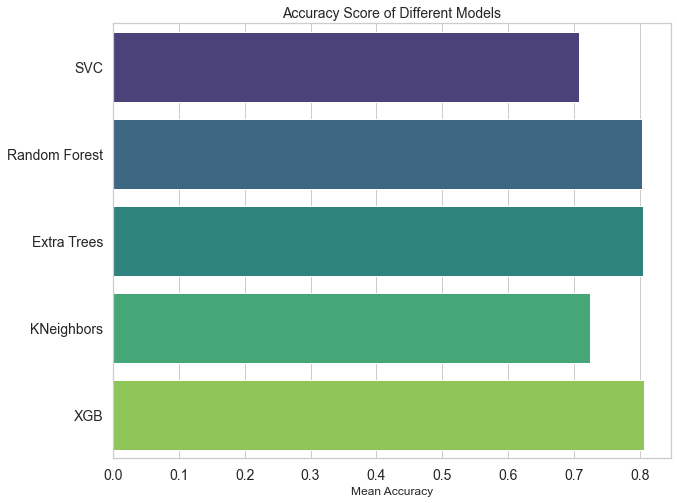

In [117]:
# Plot with the mean accuracy of the models
performnance = [results_SVC['mean_test_score'].mean(),results_RF['mean_test_score'].mean(),results_ET['mean_test_score'].mean(),results_KN['mean_test_score'].mean(),
                results_XGB['mean_test_score'].mean()]
model = ['SVC','Random Forest','Extra Trees','KNeighbors','XGB']

plt.figure(figsize=(10,8))
ax = sns.barplot(x=performnance, y=model, palette='viridis')
plt.yticks(size = 14)
plt.xticks(size = 14)
plt.xlabel('Mean Accuracy')
plt.title("Accuracy Score of Different Models", size=14)
plt.show()

In [ ]:
#clf = make_pipeline(ct, ExtraTreesClassifier(max_depth=40, n_estimators=500,min_samples_leaf=1))
#clf

<a id='6'></a>

## 5. Model Evaluation

In [ ]:
clf = make_pipeline(ct, ExtraTreesClassifier(max_depth=40, n_estimators=500, min_samples_leaf=1))
clf

In [ ]:
from sklearn.model_selection import cross_val_score

print("MSE = {0:.4f}".format(-np.mean(cross_val_score(clf, X, y, scoring='neg_mean_squared_error'))))

In [ ]:
print("Accuracy = {0:.4f}".format(np.mean(cross_val_score(clf, X, y, scoring='accuracy'))))

In [ ]:
clf.fit(X,y)

### Prediction

In [ ]:
df = pd.read_csv('Test.csv',sep=',', index_col='Id')

In [ ]:
df.loc[df['Hillshade_3pm'] == 0, 'Hillshade_3pm'] = np.nan
df = df.groupby(['Hillshade_9am']).apply(lambda x: x.ffill().bfill())

In [ ]:
X_test = df

In [ ]:
X_test.loc[X_test['Hillshade_3pm'].isna(), 'Hillshade_3pm'] = 0

In [ ]:
X_test = drop_soil_columns(X_test)

In [ ]:
# Combine and drop features
X_test['Soil_Type32_33'] = X_test['Soil_Type32']+ X_test['Soil_Type33']
X_test = X_test.drop(columns=['Soil_Type32','Soil_Type33'])

X_test['Soil_Type21_23'] = X_test['Soil_Type21']+ X_test['Soil_Type23']
X_test = X_test.drop(columns=['Soil_Type21','Soil_Type23'])

# add columns
X_test['Ele_plus_VDtHyd'] = X_test['Elevation']+X_test['Vertical_Distance_To_Hydrology']
X_test['Hydro_plus_Fire'] = X_test['Horizontal_Distance_To_Hydrology']+X_test['Horizontal_Distance_To_Fire_Points']
X_test['Hydro_minus_Fire'] = X_test['Horizontal_Distance_To_Hydrology']-X_test['Horizontal_Distance_To_Fire_Points']
X_test['Hydro_plus_Road'] = X_test['Horizontal_Distance_To_Hydrology']+X_test['Horizontal_Distance_To_Roadways']
X_test['Hydro_minus_Road'] = X_test['Horizontal_Distance_To_Hydrology']-X_test['Horizontal_Distance_To_Roadways']
X_test['Fire_plus_Road'] = X_test['Horizontal_Distance_To_Fire_Points']+X_test['Horizontal_Distance_To_Roadways']
X_test['Fire_minus_Road'] = X_test['Horizontal_Distance_To_Fire_Points']-X_test['Horizontal_Distance_To_Roadways']
X_test['Elev_to_HD_Hyd']=X_test['Elevation'] - 0.2 * X_test['Horizontal_Distance_To_Hydrology']
X_test['Elev_to_HD_Road']=X_test['Elevation'] - 0.05 * X_test['Horizontal_Distance_To_Roadways'] 
X_test['Elev_to_VD_Hyd']=X_test['Elevation'] - X_test['Vertical_Distance_To_Hydrology']
X_test['Mean_Amenities']=(X_test['Horizontal_Distance_To_Fire_Points'] + X_test['Horizontal_Distance_To_Hydrology'] + X_test['Horizontal_Distance_To_Roadways']) / 3
X_test['Mean_Fire_Hyd']=(X_test['Horizontal_Distance_To_Fire_Points'] + X_test['Horizontal_Distance_To_Hydrology']) / 2 


X_test['Net_Distance_To_Hydrology'] = np.sqrt(X_test["Vertical_Distance_To_Hydrology"]*2 + X_test["Horizontal_Distance_To_Hydrology"]*2)
X_test.loc[X_test['Net_Distance_To_Hydrology'].isna(), 'Net_Distance_To_Hydrology'] = 0
#X_test = X_test.drop(columns=['Vertical_Distance_To_Hydrology','Horizontal_Distance_To_Hydrology'])
#boolean = X.iloc[:,10:50].keys().tolist()
boolean = X_test.iloc[:,10:50].keys().tolist()
X_test.iloc[:,10:50].describe()

In [ ]:
predictions = clf.predict(X_test)

In [ ]:
Test = pd.read_csv('Test.csv', sep = ',')
results = pd.DataFrame()
results['Id']= Test['Id']
results['Cover_Type'] = predictions
results.head(20)

In [ ]:
plt.figure(figsize=(10,4))
plt.hist(results['Cover_Type'], bins=40, color='mediumseagreen')
plt.xlabel('Cover_Type')
plt.ylabel('Count of trees')
plt.show()